## Geoduck Gonad SRM Data Analysis 

This notebook walks through 4 R scripts, and works with datasets downloaded from Skyline & the Mass Spec sequence file.  Skyline data is exported as report with the following metrics: Protein Name, Transitions, Peptide Sequence, Fragment Ion, Peptide Retention Time, Area.  Datasets used in this analysis, and all plots, scripts, etc., can be found in the [Geoduck-DNR](https://github.com/laurahspencer/Geoduck-DNR) repo:

* Skyline Report (formatting slightly modified): [2017-08-11_Transition Results_LHS modified-noRT-pivoted.csv](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Data/2017-08-11_Transition%20Results_LHS%20modified-noRT-pivoted.csv)
* Mass Spec Sequence File: [2017-07-28_SRM-Sequence-final.csv](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Data/2017-07-28_SRM-Sequence-final.csv)
* Sample Key: [2017-08-14-Geoduck-samples.csv](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Data/2017-08-14-Geoduck-samples.csv)

* Script #1: [2017-09-04_SRM-notNorm-script1-tech-rep-review.R](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Analyses/2017-August_SRM-Analysis/2017-09-04_SRM-notNorm-script1-tech-rep-review.R)
* Script #2: [2017-09-04_SRM-notNorm-script2-NMDS%2CANOSIM.R](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Analyses/2017-August_SRM-Analysis/2017-09-04_SRM-notNorm-script2-NMDS%2CANOSIM.R) 
* Script #3: [2017-09-04_SRM-notNorm-script3-Stats-Barplots.R](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Analyses/2017-August_SRM-Analysis/2017-09-04_SRM-notNorm-script3-Stats-Barplots.R)
* Script #4: [2017-09-04_SRM-notNorm-script4-Protein-ANOSIM-plots.R](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Analyses/2017-August_SRM-Analysis/2017-09-04_SRM-notNorm-script4-Protein-ANOSIM-plots.R)

### Findings: 
  * The SRM data indicate that there is significant difference in the 13 proteins analyzed when grouped by site.  
  * Fidalgo Bay (FB) & Port Gamble Bay (PG) samples cluster together, while the Case Inlet (CI) & Willapa Bay (WB) samples cluster
  * 3 proteins are significantly different between sites: Heat Shock Protein 70, HSP90, Protein Disulfide Isomerase
  * All 3 proteins were more abundant in FB & PG as compared to CI & WB, and are involved in protein folding/refolding & degradation of damaged proteins
  * Abundance in the 3 proteins correlated with low pH and high DO.
  * See my **slide deck** from my presentation at the 2017 PCSGA conference: [Geoduck as indicators of environmental change](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Admin/2017-09-20_PCSGA-presentation.pdf)

**This dataset is analyzed without normalization.**  

SRM data is often normalized via an internal standard (e.g. Peptide Retention Time Calibration (PRTC)). PRTC normalization minimizes differences in abundance caused by mass spec detection differences. Due to wonky PRTC levels in my geoduck samples, and nicely clustering technical replicates.

More details on PRTC "wonkyness": PRTC abundance was very different depending on the batch of PRTC I used to prepare my samples. I used 4 different PRTC batches. Batch D was prepared using (theoretically) a standard at 10% the concentration of the other batches (A-C). However, there are other significant differences in concentrations. For example, Batch B included just 4 samples, and was prepared using a PRTC standard prepared by Yaamini that obviously had much higher concentration.  Here are some images from Skyline showing 2 PRTC peptides abundances across all samples (this includes technical replicates).  X axis represents injection time. 

![PRTC peptide 1](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Images/2017-08-24-PRTC-peptide1.png?raw=true)

![PRTC peptide 2](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Images/2017-08-24-PRTC-peptide2.png?raw=true)

I experimented with normalization in the below scripts, which can be used in future analysis of SRM data:

Normalizing based on Total Ion Concentration: 
  * [2017-09-04_SRM-TotAbunNorm-script1-Normalize.R](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Analyses/2017-August_SRM-Analysis/2017-09-04_SRM-TotAbunNorm-script1-Normalize.R)
  * Subsequent scripts were not created due to very poor quality technical resplicate clustering. 


Normalizing based on adjusted PRTC abundance: 
  * [2017-09-04_SRM-PRTCNorm-script1-Normalize.R](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Analyses/2017-August_SRM-Analysis/2017-09-04_SRM-PRTCNorm-script1-Normalize.R)
  * [2017-09-04_SRM-PRTCNorm-script2-tech-rep-review%2CNMDS.R](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Analyses/2017-August_SRM-Analysis/2017-09-04_SRM-PRTCNorm-script2-tech-rep-review%2CNMDS.R)
  * [2017-09-04_SRM-PRTCNorm-script3-ANOSIM.R](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Analyses/2017-August_SRM-Analysis/2017-09-04_SRM-PRTCNorm-script3-ANOSIM.R)
  * [2017-09-04_SRM-PRTCNorm-script4-Stats%2CBarplots.R](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Analyses/2017-August_SRM-Analysis/2017-09-04_SRM-PRTCNorm-script4-Stats%2CBarplots.R)

In [6]:
# Check R Version
R.Version()

$platform
[1] "x86_64-apple-darwin13.4.0"

$arch
[1] "x86_64"

$os
[1] "darwin13.4.0"

$system
[1] "x86_64, darwin13.4.0"

$status
[1] ""

$major
[1] "3"

$minor
[1] "3.1"

$year
[1] "2016"

$month
[1] "06"

$day
[1] "21"

$`svn rev`
[1] "70800"

$language
[1] "R"

$version.string
[1] "R version 3.3.1 (2016-06-21)"

$nickname
[1] "Bug in Your Hair"

In [2]:
library(dplyr)
library(ggplot2)
library(reshape2)
library(RColorBrewer)
library(vegan)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”Warning message:
“package ‘vegan’ was built under R version 3.3.2”Loading required package: permute
Loading required package: lattice
This is vegan 2.4-3


## Script 1:  Import data, QA technical replicates via NMDS

### Import datasets, set working directory

In [7]:
setwd("~/Documents/Roberts Lab/Geoduck-DNR/") 
SRMreport <- read.csv("Data/2017-08-11_Transition Results_LHS modified-noRT-pivoted.csv", header=FALSE, na.strings = "#N/A", stringsAsFactors = FALSE) # import local file
SRMsequence <- read.csv("Data/2017-07-28_SRM-Sequence-final.csv", header=TRUE, stringsAsFactors = FALSE)
sample.key <- read.csv("Data/2017-08-14-Geoduck-samples.csv", header=TRUE, stringsAsFactors = FALSE)
dilution.curve <- read.csv("Data/2017-09-05_Dilution-Curve-Results.csv", header=TRUE, stringsAsFactors = FALSE)
OutplantData <- read.csv("Data/Outplant-Temp-Data.csv", header=TRUE, stringsAsFactors =FALSE)
SRMsamples <- noquote(as.character(c("G013", "G120", "G047", "G017", "G079", "G127", "G060", "G009", "G002", "G128", "G016", "G071-A", "G114", "G045", "G132", "G031", "G012", "G116", "G043", "G015", "G040", "G110", "G008", "G109", "G122", "G041", "G066", "G105", "G032", "G129", "G054", "G081", "G003", "G074", "G014", "G049", "G053", "G104", "G055", "G042", "G064", "G073", "G057", "G007", "G070", "G001", "G071-B", "G062")))

### REPLACE REPLICATE NAMES WITH SAMPLE NAMES 
Note: I could also probably use the function merge() for this task

In [8]:
# requires library(dplyr) 
rep.names <- SRMreport[1,] # create vector of replicate names
rep.names.short <- noquote(gsub(' Area', '', rep.names)) # remove Area from rep name, and don't include quotes 
rep.names.short <- noquote(gsub('2017_July_10_bivalves_', '', rep.names.short)) #remove the extra long rep name that is a residual from the .raw file name
repsTOsamples <- as.data.frame(SRMsequence[,c(2,3,5)])
repsTOsamples.filtered <- filter(repsTOsamples, repsTOsamples[,1] %in% rep.names.short)
samples <- as.character(repsTOsamples.filtered$Sample...rep.name)
other.headers <- as.character(rep.names.short[1:4])
samples.vector <- noquote(c(other.headers, samples, stringsAsFactors = FALSE))
samples.vector <- samples.vector[-121]
SRM.data <- SRMreport
SRM.data[1,] <- samples.vector
colnames(SRM.data) <- SRM.data[1,] #make first row column names


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### ANNOTATE SAMPLE NAMES WITH SITE & TREATMENT

In [9]:
repsTOsamples.filtered.annotated <- filter(sample.key[,c(8,9)], sample.key$PRVial %in% repsTOsamples.filtered$Comment) #pull site & treatment from sample key
length(SRMsamples) == nrow(repsTOsamples.filtered.annotated) # should equal TRUE if I haven't lost any sample data
repsTOsamples.filtered.annotated # ISSUE IDENTIFIED: missing 71-A & 71-B, need to fix 

# Add G071-A & G071-B coding to the annotated key
s71.A <- data.frame(matrix(0, ncol=2, nrow=1))
s71.A[1,1] <- "G071.A"
s71.A[1,2] <- "PG-E"
colnames(s71.A) <- colnames(repsTOsamples.filtered.annotated)
s71.B <- data.frame(matrix(0, ncol=2, nrow=1))
s71.B[1,1] <- "G071.B"
s71.B[1,2] <- "PG-E"
colnames(s71.B) <- colnames(repsTOsamples.filtered.annotated)
sample.key.annotated <- rbind(repsTOsamples.filtered.annotated, s71.A, s71.B) # row bind annotated key w/ 71 info

# Subset sample names for site & treatment combos
CI.E <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "CI-E"),]
CI.B <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "CI-B"),]
PG.E <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "PG-E"),]
PG.B <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "PG-B"),]
WB.E <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "WB-E"),]
WB.B <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "WB-B"),]
FB.E <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "FB-E"),]
FB.B <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "FB-B"),]

# Isolate just sample names for each site/treatment combo
CI.E.samples <- CI.E$PRVial
CI.B.samples <- CI.B$PRVial
PG.E.samples <- PG.E$PRVial
PG.B.samples <- PG.B$PRVial
WB.E.samples <- WB.E$PRVial
WB.B.samples <- WB.B$PRVial
FB.E.samples <- FB.E$PRVial
FB.B.samples <- FB.B$PRVial

# Isolate eelgrass and bare group sample names
Eelgrass.samples <- c(CI.E.samples, PG.E.samples, WB.E.samples, FB.E.samples)
Bare.samples <- c(CI.B.samples, PG.B.samples, WB.B.samples, FB.B.samples)


[1] FALSE

PRVial,Sample.Shorthand
G001,CI-E
G002,CI-E
G003,CI-E
G007,CI-E
G008,CI-E
G009,CI-E
G012,CI-B
G013,CI-B
G014,CI-B
G015,CI-B


### CONVERT AREA DATA TO NUMERIC FORMAT

In [10]:
SRM.data.numeric <- SRM.data[-1,] # First, remove row #1 (excess info) & change all area values to numeric, so I can average, etc. I know that my area data is from column 5 to 120 
SRM.data.numeric[,5:120] <- as.numeric( 
  as.character(
    unlist(
      SRM.data.numeric[,5:120])
  )
)
is.numeric(SRM.data.numeric[5,20]) # confirm area data is numeric, using a random cell. Should equal TRUE.

[1] TRUE

### NAME EACH ROW WITH A UNIQUE TRANSITION ID

In [11]:
nTransitions <- length(SRM.data.numeric$Transition) # How many transitions are there
Transition.ID <- vector(length=nTransitions) # create empty vector with length= number of transitions
for (i in 1:nTransitions) {  
  Transition.ID[i] <- paste(SRM.data.numeric[i,3], SRM.data.numeric[i,4])}  # loop that fills empty vector with unique transition ID, built from the peptide sequence (column 3) and the fragment ion (columm 4)
Transition.ID # confirm correctly named transition IDs
length(SRM.data.numeric$Transition) == length(Transition.ID) # confirm that I didn't lose any transitions
row.names(SRM.data.numeric) <- Transition.ID # assign newly created transition IDs as row names
write.csv(SRM.data.numeric, file="Analyses/2017-September_SRM-results/2017-09-04_SRM-data-NotNORM-annotated.csv") #write this file out for safe keeping

[1] "GVVDSEDLPLNISR y11"       "GVVDSEDLPLNISR y7"       
  [3] "GVVDSEDLPLNISR y6"        "EVVQSSAFVER y8"          
  [5] "EVVQSSAFVER y7"           "EVVQSSAFVER y6"          
  [7] "DSSTMGYMAAK y8"           "DSSTMGYMAAK y7"          
  [9] "DSSTMGYMAAK y6"           "TTPSYVAFNDTER y8"        
 [11] "TTPSYVAFNDTER y7"         "TTPSYVAFNDTER y6"        
 [13] "NAVVTVPAYFNDAQR y12"      "NAVVTVPAYFNDAQR y11"     
 [15] "NAVVTVPAYFNDAQR y9"       "IINEPTAAALAYGLDK y12"    
 [17] "IINEPTAAALAYGLDK y9"      "IINEPTAAALAYGLDK y6"     
 [19] "THGAPTDEER y7"            "THGAPTDEER y6"           
 [21] "THGAPTDEER y3"            "ISLTGPHSIIGR y9"         
 [23] "ISLTGPHSIIGR y8"          "ISLTGPHSIIGR y7"         
 [25] "TIVVHADVDDLGK y9"         "TIVVHADVDDLGK y8"        
 [27] "APNSFNLR y5"              "APNSFNLR y4"             
 [29] "APNSFNLR y3"              "VLYPNDNFFEGK y9"         
 [31] "VLYPNDNFFEGK y8"          "VLYPNDNFFEGK y4"         
 [33] "TSFDAFPDK y6"             "TSFDAFPDK y5"            
 [35] "TSFDAFPDK y3"             "IITRPFNVNGLLAYDSR y6"    
 [37] "IITRPFNVNGLLAYDSR y5"     "IITRPFNVNGLLAYDSR y4"    
 [39] "WLDESGVFLPEEHPSR y9"      "WLDESGVFLPEEHPSR y7"     
 [41] "WLDESGVFLPEEHPSR y4"      "QSLLPFGATGPR y8"         
 [43] "QSLLPFGATGPR y7"          "QSLLPFGATGPR y6"         
 [45] "AGELGGSDPDYAMR y10"       "AGELGGSDPDYAMR y6"       
 [47] "AGELGGSDPDYAMR y4"        "LYSYSDTHR y6"            
 [49] "LYSYSDTHR y5"             "LYSYSDTHR y3"            
 [51] "LTANIAGHLIGAQEFIQK y9"    "LTANIAGHLIGAQEFIQK y8"   
 [53] "LTANIAGHLIGAQEFIQK y3"    "ALFIIDDK y5"             
 [55] "ALFIIDDK y4"              "ALFIIDDK y3"             
 [57] "QITMNDLPVGR y7"           "QITMNDLPVGR y5"          
 [59] "QITMNDLPVGR y4"           "LVQAFQFTDK y7"           
 [61] "LVQAFQFTDK y6"            "LVQAFQFTDK y4"           
 [63] "AAQDNGLLTDVLAYK y8"       "AAQDNGLLTDVLAYK y7"      
 [65] "AAQDNGLLTDVLAYK y3"       "ALELGLKPK y6"            
 [67] "ALELGLKPK y5"             "ALELGLKPK y3"            
 [69] "FNLWGGSLSLGHPFGATGVR y12" "FNLWGGSLSLGHPFGATGVR y10"
 [71] "FNLWGGSLSLGHPFGATGVR y8"  "VVLVGDSGVGK y7"          
 [73] "VVLVGDSGVGK y5"           "STIGVEFATR y7"           
 [75] "STIGVEFATR y5"            "STIGVEFATR y4"           
 [77] "AQLWDTAGQER y8"           "AQLWDTAGQER y7"          
 [79] "AQLWDTAGQER y6"           "TVIEPMAGDGLR y9"         
 [81] "TVIEPMAGDGLR y8"          "TVIEPMAGDGLR y6"         
 [83] "MVTGDNVNTAR y8"           "MVTGDNVNTAR y6"          
 [85] "MVTGDNVNTAR y4"           "LLDQVWPDLR y6"           
 [87] "LLDQVWPDLR y5"            "LLDQVWPDLR y4"           
 [89] "LNSGSVGVYR y7"            "LNSGSVGVYR y5"           
 [91] "LNSGSVGVYR y4"            "SLTENFVTEEQAK y7"        
 [93] "SLTENFVTEEQAK y6"         "SLTENFVTEEQAK y4"        
 [95] "SIQQSVENIR y7"            "SIQQSVENIR y6"           
 [97] "SIQQSVENIR y4"            "NNKPSDYQGGR y8"          
 [99] "NNKPSDYQGGR y7"           "NNKPSDYQGGR y5"          
[101] "DNVVVIGFFK y7"            "DNVVVIGFFK y6"           
[103] "DNVVVIGFFK y5"            "MDSTANEVEDVK y8"         
[105] "MDSTANEVEDVK y7"          "MDSTANEVEDVK y5"         
[107] "APGLPAQIK y6"             "APGLPAQIK y5"            
[109] "APGLPAQIK y4"             "MDVEGTLPEDLK y9"         
[111] "MDVEGTLPEDLK y8"          "MDVEGTLPEDLK y5"         
[113] "GLGLGGVPGQNGK y9"         "GLGLGGVPGQNGK y8"        
[115] "GLGLGGVPGQNGK y6"         "LTILEELR y6"             
[117] "LTILEELR y5"              "LTILEELR y4"             
[119] "GLILVGGYGTR y8"           "GLILVGGYGTR y7"          
[121] "GLILVGGYGTR y6"           "ELGQSGVDTYLQTK y10"      
[123] "ELGQSGVDTYLQTK y7"        "SAAGAFGPELSR y7"         
[125] "SAAGAFGPELSR y6"          "TASEFDSAIAQDK y9"        
[127] "TASEFDSAIAQDK y8"         "IGDYAGIK y6"             
[129] "IGDYAGIK y5"              "DIPVPKPK y6"             
[131] "DIPVPKPK y5"              "DIPVPKPK y4"             
[133] "HVLTSIGEK y7"             "HVLTSIGE

[1] TRUE

### REMOVE POOR QUALITY PEPTIDES IDENTIFIED VIA SKYLINE & DILUTION CURVE RESULTS

Poor quality, determined via Skyline due to lack of consistent signal as compared to other peptides in the protein:  
  * Superoxide Dismutase: THGAPTDEER  
  * PDI: NNKPSDYQGGR  
  * Na/K: MVTGDNVNTAR  

Poor quality, determined via Dilution curve, where abundance did not increase/decrease with known concentration
  * HSP70: TTPSYVAFNDTER  
  * Peroxiredoxin: LVQAFQFTDK  
  * Ras-related Rab: QITMNDLPVGR & VVLVGDSGVGK  
  * Na/K: AQLWDTAGQER & MVTGDNVNTAR  

In [12]:
SRM.data.screened <- SRM.data.numeric[!grepl(c("THGAPTDEER|NNKPSDYQGGR|MVTGDNVNTAR|TTPSYVAFNDTER|LVQAFQFTDK|QITMNDLPVGR|VVLVGDSGVGK|AQLWDTAGQER"), SRM.data.numeric$`Peptide Sequence`),]
SRM.data.screened.noPRTC <- SRM.data.screened[!grepl("PRTC peptides", SRM.data.screened$`Protein Name`),]
write.csv(SRM.data.screened.noPRTC, file="Analyses/2017-September_SRM-results/2017-09-04_SRM-data-NotNORM-screenednoPRTC.csv")

### CREATE NMDS PLOT

Warning message:
“package ‘vegan’ was built under R version 3.3.2”Loading required package: permute
Loading required package: lattice
This is vegan 2.4-3


,GVVDSEDLPLNISR y11,GVVDSEDLPLNISR y7,GVVDSEDLPLNISR y6,EVVQSSAFVER y8,EVVQSSAFVER y7,EVVQSSAFVER y6,DSSTMGYMAAK y8,DSSTMGYMAAK y7,DSSTMGYMAAK y6,NAVVTVPAYFNDAQR y12,⋯,MDSTANEVEDVK y5,APGLPAQIK y6,APGLPAQIK y5,APGLPAQIK y4,MDVEGTLPEDLK y9,MDVEGTLPEDLK y8,MDVEGTLPEDLK y5,GLGLGGVPGQNGK y9,GLGLGGVPGQNGK y8,GLGLGGVPGQNGK y6
G013-A,987740,1910000,6176002,3556501,6138959,1531093,901001,1479904,1514402,116113,⋯,336991,468415,8088577,150834,913755,1465243,1182482,1372729,308458,1793906
G120-A,1501808,3157734,9747394,3969099,6825041,1729247,985339,1579906,1740511,214695,⋯,408865,778783,14113084,267616,1371418,2253120,1866920,2032595,465109,2771869
G047-A,974459,1884468,6047505,2668249,4442289,1124735,521077,785532,839748,166987,⋯,265385,265305,4544924,68790,487664,775905,688723,957231,184172,1282541
G017-A,1172389,2400880,7645407,3662459,6438165,1619856,1016707,1539532,1698212,226217,⋯,504757,678507,12059317,242469,1048020,1637443,1422567,1888984,401932,2485081
G079-A,2052848,4622060,14886697,7219750,13010634,3355246,1719785,2765750,3131346,351498,⋯,832725,709274,12438625,247745,1416926,2368449,2037102,1907694,428138,2613954
G127-A,1189673,2411904,7507701,2302575,3904433,1022398,822092,1191936,1315800,179768,⋯,407145,531478,9470033,174942,968465,1558876,1302080,1425175,324541,1881619


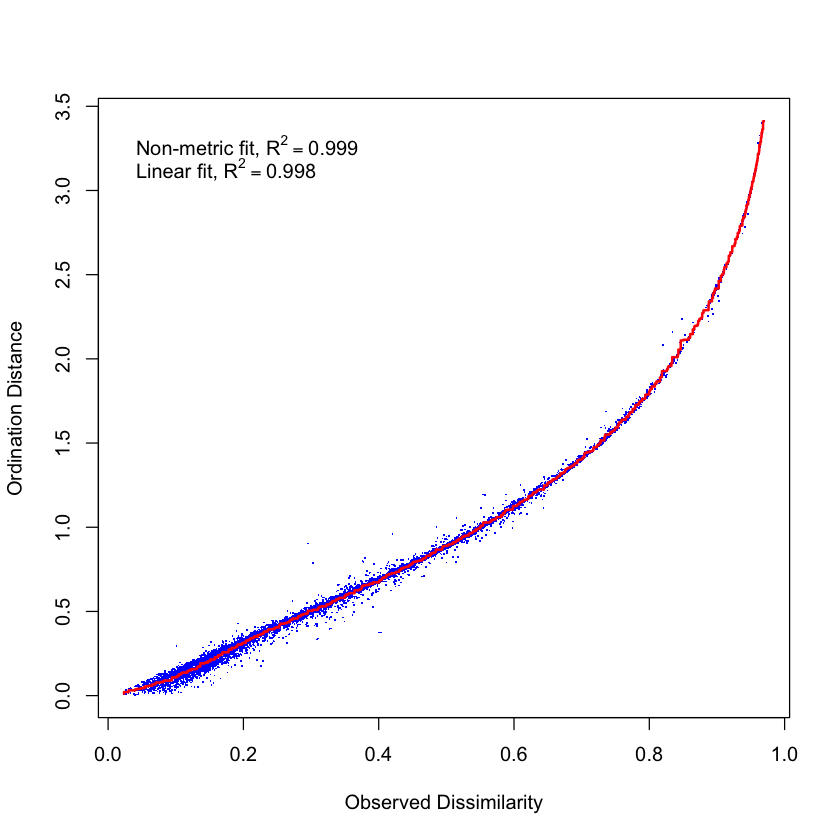

In [13]:
# requires library(vegan)
#Load the source file for the biostats package, biostats.R script must be saved in working directory
source("References/biostats.R") #Either load the source R script or copy paste. Must run this code before NMDS.
#Transpose the file so that rows and columns are switched 
SRM.data.t <- t(SRM.data.screened.noPRTC[, -1:-4]) # t() function transposes, removes PRTC transitions, extraneous info

#Replace NA cells with 0; metaMDS() does not handle NA's 
SRM.data.t.noNA <- SRM.data.t
SRM.data.t.noNA[is.na(SRM.data.t.noNA)] <- 0
head(SRM.data.t.noNA)

#Make MDS dissimilarity matrix
SRM.nmds <- metaMDS(SRM.data.t.noNA, distance = 'bray', k = 2, trymax = 3000, autotransform = FALSE, trace=0)
# comm= your data.frame or matrix
# distance= bray, (not sure what this means)
# k= # of dimensions to assess
# trymax = max # iterations to attempt if no solution is reached
# Create Shepard plot, which shows scatter around the regression between the interpoint distances in the final configuration (i.e., the distances between each pair of communities) against their original dissimilarities.
stressplot(SRM.nmds) #review regression results 

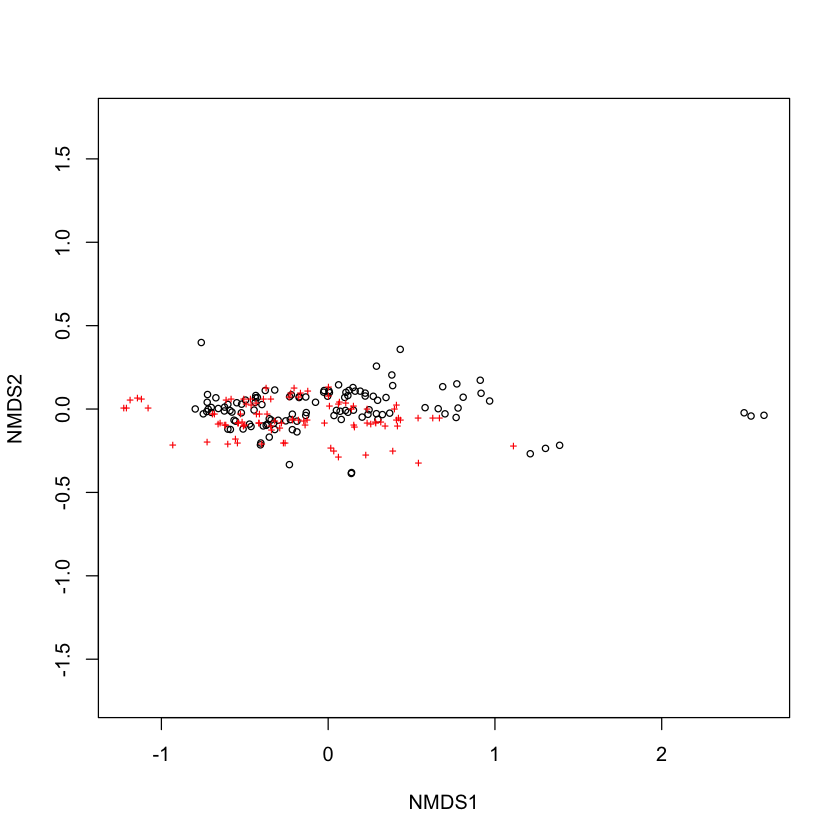

In [14]:
# Make simple figure, where:
# site (aka geoduck sample) in black circle
# species (aka transition) in red ticks
plot(SRM.nmds)

### MAKE FIGURE WITH SAMPLE ANNOTATIONS TO ASSESS TECH REPLICATE QUALITY
good resource: https://stat.ethz.ch/pipermail/r-sig-ecology/2011-September/002371.html  
**NOTE:** when doing this in R I plotted each line of text separately to visually inspect quality of technical replicates

[1] "G001-A"        "G001-B"        "G002-A"        "G002-B"       
  [5] "G002-C"        "G003-A"        "G003-B"        "G003-C"       
  [9] "G007-A"        "G007-B"        "G008-A"        "G008-B"       
 [13] "G009-A"        "G009-B"        "G012-A"        "G012-B"       
 [17] "G012-C"        "G013-A"        "G013-C"        "G014-A"       
 [21] "G014-B"        "G015-A"        "G015-B"        "G016-A"       
 [25] "G016-B"        "G016-C"        "G017-A"        "G017-B"       
 [29] "G031-A"        "G031-B"        "G031-C"        "G032-A"       
 [33] "G032-B"        "G040-A"        "G040-B"        "G041-A"       
 [37] "G041-B"        "G042-A"        "G042-B"        "G042-C"       
 [41] "G043-A"        "G043-B"        "G045-A"        "G045-B"       
 [45] "G047-A"        "G047-B"        "G049-A"        "G049-B"       
 [49] "G053-A"        "G053-B"        "G053-remake-C" "G053-remake-D"
 [53] "G054-A"        "G054-B"        "G055-A"        "G055-B"       
 [57] "G055-C"        "G057-A"        "G057-B"        "G057-C"       
 [61] "G060-A"        "G060-B"        "G062-B"        "G062-C"       
 [65] "G064-A"        "G064-B"        "G066-A"        "G066-B"       
 [69] "G070-A"        "G070-B"        "G070-C"        "G071-A-A"     
 [73] "G071-A-B"      "G071-B-A"      "G071-B-B"      "G073-A"       
 [77] "G073-B"        "G073-C"        "G074-A"        "G074-B"       
 [81] "G079-A"        "G079-B"        "G081-A"        "G081-B"       
 [85] "G104-A"        "G104-B"        "G104-remake-C" "G104-remake-D"
 [89] "G105-A"        "G105-B"        "G109-A"        "G109-B"       
 [93] "G109-C"        "G110-A"        "G110-B"        "G114-A"       
 [97] "G114-B"        "G114-remake-C" "G114-remake-D" "G116-A"       
[101] "G116-B"        "G120-A"        "G120-B"        "G122-A"       
[105] "G122-B"        "G127-A"        "G127-B"        "G127-C"       
[109] "G128-A"        "G128-C"        "G128-D"        "G129-A"       
[113] "G129-B"        "G132-A"        "G132-C"        "G132-D"

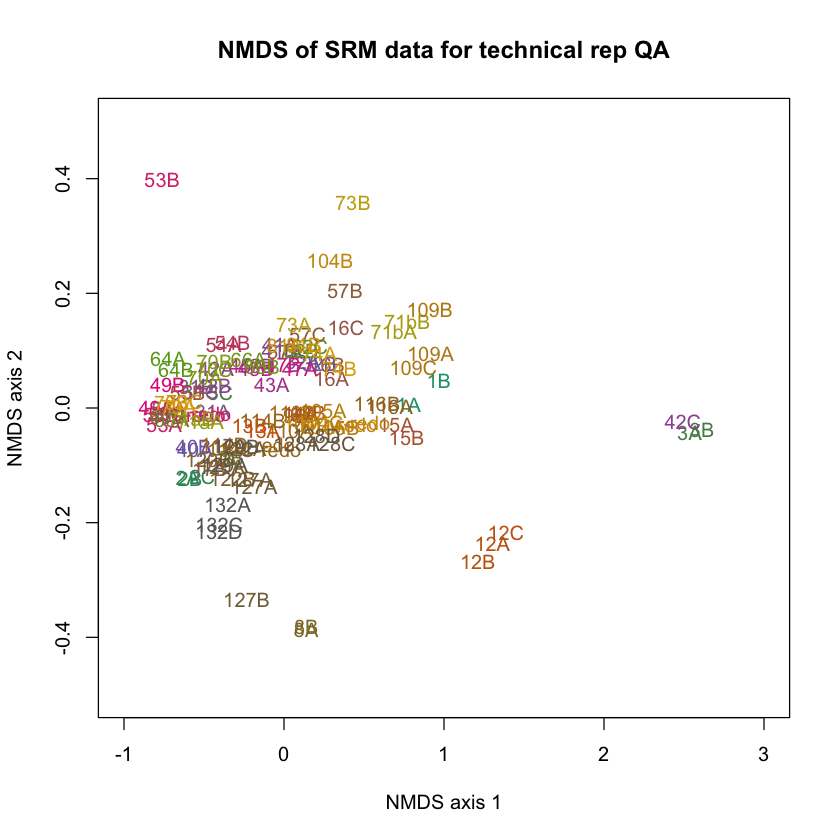

In [15]:
# requires library(RColorBrewer)
SRM.nmds.samples <- scores(SRM.nmds, display = "sites")
SRM.nmds.samples.sorted <- SRM.nmds.samples[ order(row.names(SRM.nmds.samples)), ]
rownames(SRM.nmds.samples.sorted) #confirm row names
colors <- colorRampPalette(brewer.pal(8,"Dark2"))(48)

### PLOTTING ALL REPS WITH SAMPLE NUMBER ID'S ### 
plot.default(x=NULL, y=NULL, type="n", xlab="NMDS axis 1", ylab="NMDS axis 2", xlim=c(-1,3), ylim=c(-0.5,0.5), asp=NA, main= "NMDS of SRM data for technical rep QA")
text(SRM.nmds.samples.sorted[c("G001-A", "G001-B"),], labels=c("1A", "1B"), col=colors[1])
text(SRM.nmds.samples.sorted[c("G002-A", "G002-B", "G002-C"),], labels=c("2A", "2B", "2C"), col=colors[2])
text(SRM.nmds.samples.sorted[c("G003-A", "G003-B", "G003-C"),], labels=c("3A", "3B", "3C"), col=colors[3]) #G003-C is very different
text(SRM.nmds.samples.sorted[c("G007-A", "G007-B"),], labels=c("7A", "7B"), col=colors[4])
text(SRM.nmds.samples.sorted[c("G008-A", "G008-B"),], labels=c("8A", "8B"), col=colors[5])
text(SRM.nmds.samples.sorted[c("G009-A", "G009-B"),], labels=c("9A", "9B"), col=colors[6])
text(SRM.nmds.samples.sorted[c("G012-A", "G012-B", "G012-C"),], labels=c("12A", "12B", "12C"), col=colors[7])
text(SRM.nmds.samples.sorted[c("G013-A", "G013-C"),], labels=c("13A", "13B"), col=colors[8])
text(SRM.nmds.samples.sorted[c("G014-A", "G014-B"),], labels=c("14A", "14B"), col=colors[9])
text(SRM.nmds.samples.sorted[c("G015-A", "G015-B"),], labels=c("15A", "15B"), col=colors[10])
text(SRM.nmds.samples.sorted[c("G016-A", "G016-B", "G016-C"),], labels=c("16A", "16B", "16C"), col=colors[11]) # not perfect 
text(SRM.nmds.samples.sorted[c("G017-A", "G017-B"),], labels=c("17A", "17B"), col=colors[12]) # not great
text(SRM.nmds.samples.sorted[c("G031-A", "G031-B", "G031-C"),], labels=c("31A", "31B", "31C"), col=colors[13]) #31- not great
text(SRM.nmds.samples.sorted[c("G032-A", "G032-B"),], labels=c("32A", "32B"), col=colors[14])
text(SRM.nmds.samples.sorted[c("G040-A", "G040-B"),], labels=c("40A", "40B"), col=colors[15])
text(SRM.nmds.samples.sorted[c("G041-A", "G041-B"),], labels=c("41A", "41B"), col=colors[16])
text(SRM.nmds.samples.sorted[c("G042-A", "G042-B", "G042-C"),], labels=c("42A", "42B", "42C"), col=colors[17]) #G042-C very off
text(SRM.nmds.samples.sorted[c("G043-A", "G043-B"),], labels=c("43A", "43B"), col=colors[18])
text(SRM.nmds.samples.sorted[c("G045-A", "G045-B"),], labels=c("45A", "45B"), col=colors[19])
text(SRM.nmds.samples.sorted[c("G047-A", "G047-B"),], labels=c("47A", "47B"), col=colors[20])
text(SRM.nmds.samples.sorted[c("G049-A", "G049-B"),], labels=c("49A", "49B"), col=colors[21])
text(SRM.nmds.samples.sorted[c("G053-A", "G053-B", "G053-remake-C", "G053-remake-D"),], labels=c("53A", "53B", "53C-redo", "53D-redo"), col=colors[22]) #53-B bad
text(SRM.nmds.samples.sorted[c("G054-A", "G054-B"),], labels=c("54A", "54B"), col=colors[23])
text(SRM.nmds.samples.sorted[c("G055-A", "G055-B"),], labels=c("55A", "55B"), col=colors[24]) #one is very off
text(SRM.nmds.samples.sorted[c("G057-A", "G057-B", "G057-C"),], labels=c("57A", "57B", "57C"), col=colors[25]) #57-B BAD
text(SRM.nmds.samples.sorted[c("G060-A", "G060-B"),], labels=c("60A", "60B"), col=colors[26]) 
text(SRM.nmds.samples.sorted[c("G062-B", "G062-C"),], labels=c("62B", "62C"), col=colors[27])
text(SRM.nmds.samples.sorted[c("G064-A", "G064-B"),], labels=c("64A", "64B"), col=colors[28])
text(SRM.nmds.samples.sorted[c("G066-A", "G066-B"),], labels=c("66A", "66B"), col=colors[29])
text(SRM.nmds.samples.sorted[c("G070-A", "G070-B", "G070-C"),], labels=c("70A", "70B", "70C"), col=colors[30])
text(SRM.nmds.samples.sorted[c("G071-A-A", "G071-A-B"),], labels=c("71aA", "71aB"), col=colors[31])
text(SRM.nmds.samples.sorted[c("G071-B-A", "G071-B-B"),], labels=c("71bA", "71bB"), col=colors[32])
text(SRM.nmds.samples.sorted[c("G073-A", "G073-B", "G073-C"),], labels=c("73A", "73B", "73C"), col=colors[33]) #all three very off
text(SRM.nmds.samples.sorted[c("G074-A", "G074-B"),], labels=c("74A", "74B"), col=colors[34])
text(SRM.nmds.samples.sorted[c("G079-A", "G079-B"),], labels=c("79A", "79B"), col=colors[35])
text(SRM.nmds.samples.sorted[c("G081-A", "G081-B"),], labels=c("81A", "81B"), col=colors[36])
text(SRM.nmds.samples.sorted[c("G104-A", "G104-B", "G104-remake-C", "G104-remake-D"),], labels=c("104A", "104B", "104C-redo", "104D-redo"), col=colors[37]) #B
text(SRM.nmds.samples.sorted[c("G105-A", "G105-B"),], labels=c("105A", "105B"), col=colors[38])
text(SRM.nmds.samples.sorted[c("G109-A", "G109-B", "G109-C"),], labels=c("109A", "109B", "109C"), col=colors[39]) #109-B BAD
text(SRM.nmds.samples.sorted[c("G110-A", "G110-B"),], labels=c("110A", "110B"), col=colors[40])
text(SRM.nmds.samples.sorted[c("G114-B", "G114-remake-C", "G114-remake-D"),], labels=c("114B", "114C-redo", "114D-redo" ), col=colors[41]) # check these out!
text(SRM.nmds.samples.sorted[c("G116-A", "G116-B"),], labels=c("116A", "116B"), col=colors[42])
text(SRM.nmds.samples.sorted[c("G120-A", "G120-B"),], labels=c("120A", "120B"), col=colors[43])
text(SRM.nmds.samples.sorted[c("G122-A", "G122-B"),], labels=c("122A", "122B"), col=colors[44])
text(SRM.nmds.samples.sorted[c("G127-A", "G127-B", "G127-C"),], labels=c("127A", "127B"), col=colors[45]) #127 B BAD
text(SRM.nmds.samples.sorted[c("G128-A", "G128-C", "G128-D"),], labels=c("128A", "128C", "128D"), col=colors[46])
text(SRM.nmds.samples.sorted[c("G129-A", "G129-B"),], labels=c("129A", "129B"), col=colors[47])
text(SRM.nmds.samples.sorted[c("G132-A", "G132-C", "G132-D"),], labels=c("132A", "132C", "132D"), col=colors[48])



### PLOTTING ALL REPS COLOR CODED AND WITH TREATMENT 

SYMBOL NUMBER KEY: 
  * 15 = eelgrass = filled square
  * 21 = bare = open circle

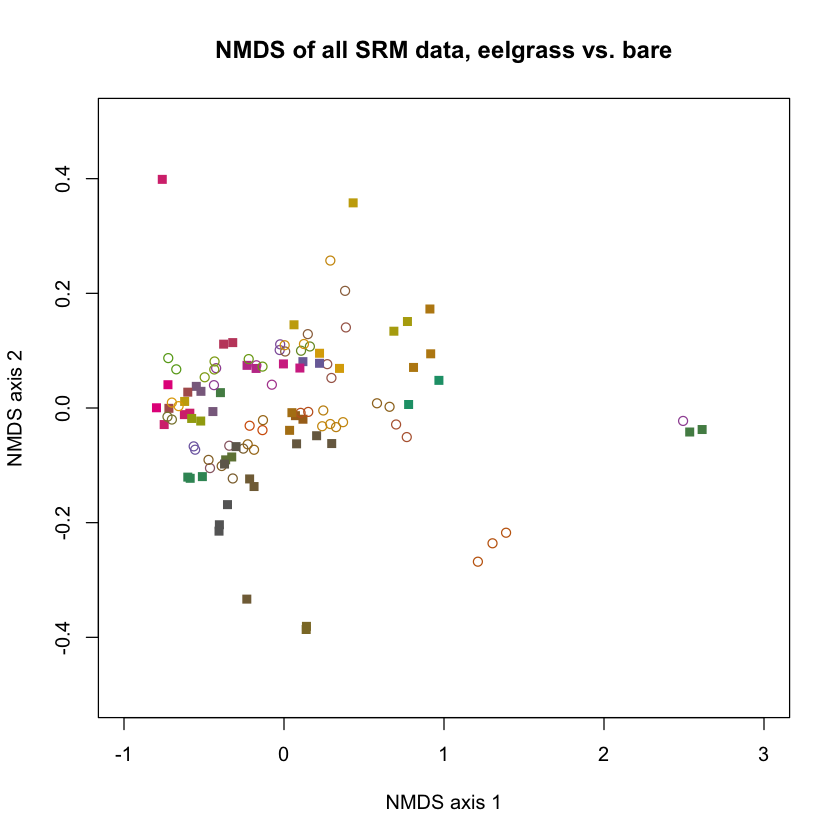

In [16]:
plot.default(x=NULL, y=NULL, main="NMDS of all SRM data, eelgrass vs. bare", type="n", xlab="NMDS axis 1", ylab="NMDS axis 2", xlim=c(-1,3), ylim=c(-0.5,0.5), asp=NA)
points(SRM.nmds.samples.sorted[c("G001-A", "G001-B"),], col=colors[1], pch=15)
points(SRM.nmds.samples.sorted[c("G002-A", "G002-B", "G002-C"),], col=colors[2], pch=15) #GOO2-B very diff
points(SRM.nmds.samples.sorted[c("G003-A", "G003-B", "G003-C"),], col=colors[3], pch=15) #G003-C is very different
points(SRM.nmds.samples.sorted[c("G007-A", "G007-B"),], col=colors[4], pch=15)
points(SRM.nmds.samples.sorted[c("G008-A", "G008-B"),], col=colors[5], pch=15)
points(SRM.nmds.samples.sorted[c("G009-A", "G009-B"),], col=colors[6], pch=15)
points(SRM.nmds.samples.sorted[c("G012-A", "G012-B", "G012-C"),], col=colors[7], pch=21)
points(SRM.nmds.samples.sorted[c("G013-A", "G013-C"),], col=colors[8], pch=21)
points(SRM.nmds.samples.sorted[c("G014-A", "G014-B"),], col=colors[9], pch=21)
points(SRM.nmds.samples.sorted[c("G015-A", "G015-B"),], col=colors[10], pch=21)
points(SRM.nmds.samples.sorted[c("G016-A", "G016-B", "G016-C"),], col=colors[11], pch=21) #GO16-A BAD 
points(SRM.nmds.samples.sorted[c("G017-A", "G017-B"),], col=colors[12], pch=21) #BAD
points(SRM.nmds.samples.sorted[c("G031-A", "G031-B", "G031-C"),], col=colors[13], pch=15)
points(SRM.nmds.samples.sorted[c("G032-A", "G032-B"),], col=colors[14], pch=15)
points(SRM.nmds.samples.sorted[c("G040-A", "G040-B"),], col=colors[15], pch=21)
points(SRM.nmds.samples.sorted[c("G041-A", "G041-B"),], col=colors[16], pch=21)
points(SRM.nmds.samples.sorted[c("G042-A", "G042-B", "G042-C"),], col=colors[17], pch=21) #G042-C very off
points(SRM.nmds.samples.sorted[c("G043-A", "G043-B"),], col=colors[18], pch=21)
points(SRM.nmds.samples.sorted[c("G045-A", "G045-B"),], col=colors[19], pch=15)
points(SRM.nmds.samples.sorted[c("G047-A", "G047-B"),], col=colors[20], pch=15)
points(SRM.nmds.samples.sorted[c("G049-A", "G049-B"),], col=colors[21], pch=15)
points(SRM.nmds.samples.sorted[c("G053-A", "G053-B", "G053-remake-C", "G053-remake-D"),], col=colors[22], pch=15) #B not good
points(SRM.nmds.samples.sorted[c("G054-A", "G054-B"),], col=colors[23], pch=15)
points(SRM.nmds.samples.sorted[c("G055-A", "G055-B"),], col=colors[24], pch=15) #one is very off
points(SRM.nmds.samples.sorted[c("G057-A", "G057-B", "G057-C"),], col=colors[25], pch=21) #57-B BAD
points(SRM.nmds.samples.sorted[c("G060-A", "G060-B"),], col=colors[26], pch=21) 
points(SRM.nmds.samples.sorted[c("G062-B", "G062-C"),], col=colors[27], pch=21)
points(SRM.nmds.samples.sorted[c("G064-A", "G064-B"),], col=colors[28], pch=21)
points(SRM.nmds.samples.sorted[c("G066-A", "G066-B"),], col=colors[29], pch=21)
points(SRM.nmds.samples.sorted[c("G070-A", "G070-B", "G070-C"),], col=colors[30], pch=21)
points(SRM.nmds.samples.sorted[c("G071-A-A", "G071-A-B"),], col=colors[31], pch=15)
points(SRM.nmds.samples.sorted[c("G071-B-A", "G071-B-B"),], col=colors[32], pch=15)
points(SRM.nmds.samples.sorted[c("G073-A", "G073-B", "G073-C"),], col=colors[33], pch=15) #all three very off
points(SRM.nmds.samples.sorted[c("G074-A", "G074-B"),], col=colors[34], pch=15)
points(SRM.nmds.samples.sorted[c("G079-A", "G079-B"),], col=colors[35], pch=21)
points(SRM.nmds.samples.sorted[c("G081-A", "G081-B"),], col=colors[36], pch=21)
points(SRM.nmds.samples.sorted[c("G104-A", "G104-B", "G104-remake-C", "G104-remake-D"),], col=colors[37], pch=21) #B
points(SRM.nmds.samples.sorted[c("G105-A", "G105-B"),], col=colors[38], pch=21)
points(SRM.nmds.samples.sorted[c("G109-A", "G109-B", "G109-C"),], col=colors[39], pch=15) #109-B BAD
points(SRM.nmds.samples.sorted[c("G110-A", "G110-B"),], col=colors[40], pch=15)
points(SRM.nmds.samples.sorted[c("G114-B", "G114-remake-C", "G114-remake-D"),], col=colors[41], pch=21) # check these out!
points(SRM.nmds.samples.sorted[c("G116-A", "G116-B"),], col=colors[42], pch=21)
points(SRM.nmds.samples.sorted[c("G120-A", "G120-B"),], col=colors[43], pch=21)
points(SRM.nmds.samples.sorted[c("G122-A", "G122-B"),], col=colors[44], pch=21)
points(SRM.nmds.samples.sorted[c("G127-A", "G127-B", "G127-C"),], col=colors[45], pch=15) #127 B BAD
points(SRM.nmds.samples.sorted[c("G128-A", "G128-C", "G128-D"),], col=colors[46], pch=15)
points(SRM.nmds.samples.sorted[c("G129-A", "G129-B"),], col=colors[47], pch=15)
points(SRM.nmds.samples.sorted[c("G132-A", "G132-C", "G132-D"),], col=colors[48], pch=15)

### AVERAGE TECH REPS, REMOVING POORLY CLUSTERING REPS 

**Tech reps removed:** 3C, 42C, 53B, 57B, 104B, 127B  
**Entire sample removed:** 73

In [17]:
# Average sample technical reps. (there's probably an easier way to do this to not manually enter the tech rep names for each sample, possibly via a loop?)
G001 <- ave(SRM.data.screened.noPRTC$`G001-A`, SRM.data.screened.noPRTC$`G001-B`)
G002 <- ave(SRM.data.screened.noPRTC$`G002-A`, SRM.data.screened.noPRTC$`G002-B`, SRM.data.screened.noPRTC$`G002-C`)
G003 <- ave(SRM.data.screened.noPRTC$`G003-A`, SRM.data.screened.noPRTC$`G003-B`) #C removed
G007 <- ave(SRM.data.screened.noPRTC$`G007-A`, SRM.data.screened.noPRTC$`G007-B`)
G008 <- ave(SRM.data.screened.noPRTC$`G008-A`, SRM.data.screened.noPRTC$`G008-B`)
G009 <- ave(SRM.data.screened.noPRTC$`G009-A`, SRM.data.screened.noPRTC$`G009-B`)
G110 <- ave(SRM.data.screened.noPRTC$`G110-A`, SRM.data.screened.noPRTC$`G110-B`)
G012 <- ave(SRM.data.screened.noPRTC$`G012-A`, SRM.data.screened.noPRTC$`G012-B`, SRM.data.screened.noPRTC$`G012-C`)
G013 <- ave(SRM.data.screened.noPRTC$'G013-A', SRM.data.screened.noPRTC$'G013-C')
G014 <- ave(SRM.data.screened.noPRTC$`G014-A`, SRM.data.screened.noPRTC$`G014-B`)
G015 <- ave(SRM.data.screened.noPRTC$`G015-A`, SRM.data.screened.noPRTC$`G015-B`)
G016 <- ave(SRM.data.screened.noPRTC$`G016-A`, SRM.data.screened.noPRTC$`G016-B`, SRM.data.screened.noPRTC$`G016-C`)
G017 <- ave(SRM.data.screened.noPRTC$`G017-A`, SRM.data.screened.noPRTC$`G017-B`)
G031 <- ave(SRM.data.screened.noPRTC$`G031-A`, SRM.data.screened.noPRTC$`G031-B`, SRM.data.screened.noPRTC$`G031-C`)
G032 <- ave(SRM.data.screened.noPRTC$`G032-A`, SRM.data.screened.noPRTC$`G032-B`)
G040 <- ave(SRM.data.screened.noPRTC$`G040-A`, SRM.data.screened.noPRTC$`G040-B`)
G041 <- ave(SRM.data.screened.noPRTC$`G041-A`, SRM.data.screened.noPRTC$`G041-B`)
G042 <- ave(SRM.data.screened.noPRTC$`G042-A`, SRM.data.screened.noPRTC$`G042-B`) #C removed
G043 <- ave(SRM.data.screened.noPRTC$`G043-A`, SRM.data.screened.noPRTC$`G043-B`)
G045 <- ave(SRM.data.screened.noPRTC$`G045-A`, SRM.data.screened.noPRTC$`G045-B`)
G047 <- ave(SRM.data.screened.noPRTC$`G047-A`, SRM.data.screened.noPRTC$`G047-B`)
G049 <- ave(SRM.data.screened.noPRTC$`G049-A`, SRM.data.screened.noPRTC$`G049-B`)
G053 <- ave(SRM.data.screened.noPRTC$`G053-A`, SRM.data.screened.noPRTC$`G053-remake-C`, SRM.data.screened.noPRTC$`G053-remake-D`) #B removed 
G054 <- ave(SRM.data.screened.noPRTC$`G054-A`, SRM.data.screened.noPRTC$`G054-B`)
G055 <- ave(SRM.data.screened.noPRTC$`G055-A`, SRM.data.screened.noPRTC$`G055-B`, SRM.data.screened.noPRTC$`G055-C`)
G057 <- ave(SRM.data.screened.noPRTC$`G057-A`, SRM.data.screened.noPRTC$`G057-C`) #B removed
G060 <- ave(SRM.data.screened.noPRTC$`G060-A`, SRM.data.screened.noPRTC$`G060-B`)
G062 <- ave(SRM.data.screened.noPRTC$`G062-B`, SRM.data.screened.noPRTC$`G062-C`)
G064 <- ave(SRM.data.screened.noPRTC$`G064-A`, SRM.data.screened.noPRTC$`G064-B`)
G066 <- ave(SRM.data.screened.noPRTC$`G066-A`, SRM.data.screened.noPRTC$`G066-B`)
G070 <- ave(SRM.data.screened.noPRTC$`G070-A`, SRM.data.screened.noPRTC$`G070-B`, SRM.data.screened.noPRTC$`G070-C`)
G071.A <- ave(SRM.data.screened.noPRTC$`G071-A-A`, SRM.data.screened.noPRTC$`G071-A-B`)
G071.B <- ave(SRM.data.screened.noPRTC$`G071-B-A`, SRM.data.screened.noPRTC$`G071-B-B`)
# G073 <- ave(SRM.data.screened.noPRTC$`G073-A`, SRM.data.screened.noPRTC$`G073-B`, SRM.data.numeric$`G073-C`)
G074 <- ave(SRM.data.screened.noPRTC$`G074-A`, SRM.data.screened.noPRTC$`G074-B`)
G079 <- ave(SRM.data.screened.noPRTC$`G079-A`, SRM.data.screened.noPRTC$`G079-B`)
G081 <- ave(SRM.data.screened.noPRTC$`G081-A`, SRM.data.screened.noPRTC$`G081-B`)
G104 <- ave(SRM.data.screened.noPRTC$`G104-A`, SRM.data.screened.noPRTC$`G104-remake-C`, SRM.data.screened.noPRTC$`G104-remake-D`) #B removed
G105 <- ave(SRM.data.screened.noPRTC$`G105-A`, SRM.data.screened.noPRTC$`G105-B`)
G109 <- ave(SRM.data.screened.noPRTC$`G109-A`, SRM.data.screened.noPRTC$`G109-C`)
G114 <- ave(SRM.data.screened.noPRTC$`G114-A`, SRM.data.screened.noPRTC$`G114-B`, SRM.data.screened.noPRTC$`G114-remake-C`, SRM.data.screened.noPRTC$`G114-remake-D`)
G116 <- ave(SRM.data.screened.noPRTC$`G116-A`, SRM.data.screened.noPRTC$`G116-B`)
G120 <- ave(SRM.data.screened.noPRTC$`G120-A`, SRM.data.screened.noPRTC$`G120-B`)
G122 <- ave(SRM.data.screened.noPRTC$`G122-A`, SRM.data.screened.noPRTC$`G122-B`)
G127 <- ave(SRM.data.screened.noPRTC$`G127-A`, SRM.data.screened.noPRTC$`G127-C`) #B removed
G128 <- ave(SRM.data.screened.noPRTC$`G128-A`, SRM.data.screened.noPRTC$`G128-C`,SRM.data.screened.noPRTC$`G128-D`)
G129 <- ave(SRM.data.screened.noPRTC$`G129-A`, SRM.data.screened.noPRTC$`G129-B`)
G132 <- ave(SRM.data.screened.noPRTC$`G132-A`, SRM.data.screened.noPRTC$`G132-C`, SRM.data.screened.noPRTC$`G132-D`)

In [18]:
PG.E.samples <- PG.E.samples[!PG.E.samples %in% "G073"] #revised PG.E.sample list, removing G073

In [19]:
# Recombine data (averaged for each sample by tech replicate)
SRM.data.mean <- cbind.data.frame(rownames(SRM.data.screened.noPRTC), G001,G002,G003,G007,G008,G009,G110,G012,G013,G014,G015,G016,G017,G031,G032,G040,G041,G042,G043,G045,G047,G049,G053,G054,G055,G057,G060,G062,G064,G066,G070,G071.A,G071.B,G074,G079,G081,G104,G105,G109,G114,G116,G120,G122,G127,G128,G129,G132)
SRM.data.mean <- data.frame(SRM.data.mean[,-1], row.names=SRM.data.mean[,1]) #make first column row names, and delete first column
write.csv(SRM.data.mean, file="Analyses/2017-September_SRM-results/2017-09-04_SRM-data-meanBYsample.csv")
head(SRM.data.mean)

,G001,G002,G003,G007,G008,G009,G110,G012,G013,G014,⋯,G105,G109,G114,G116,G120,G122,G127,G128,G129,G132
GVVDSEDLPLNISR y11,314533,1798674,24621,1318233,683319,747165,821727,65084,987740,754026,⋯,582536,241083,1254593,436765,1501808,1126921,1189673,725568,1390663,1325768
GVVDSEDLPLNISR y7,610961,3711853,50524,2713614,1384110,1476887,1653342,126501,1910000,1499522,⋯,1157511,478945,2620848,815609,3157734,2293395,2411904,1485775,2935676,2805836
GVVDSEDLPLNISR y6,1979306,11653176,181834,8640652,4340083,4627890,5211244,437760,6176002,4903490,⋯,3737252,1590136,8239565,2517330,9747394,7236141,7507701,4707973,8915357,8904695
EVVQSSAFVER y8,1063284,4868548,181507,3870012,895146,2540926,2901758,199285,3556501,2608700,⋯,1976432,873474,4175801,987582,3969099,3094142,2302575,2579367,3977985,2603057
EVVQSSAFVER y7,1747459,8790313,272152,6731578,1540452,4145422,4853134,326353,6138959,4423625,⋯,3228858,1402411,7257976,1631614,6825041,5206107,3904433,4257023,6886295,4350957
EVVQSSAFVER y6,440855,2272015,65419,1705779,384014,1061364,1160174,86969,1531093,1076635,⋯,772599,349484,1815666,407102,1729247,1366446,1022398,1042337,1726728,1144617


## Script 2: Create NMDS plot sample means, run ANOSIM test Create NMDS plot sample means, run ANOSIM test 

### CREATE LOTS OF NMDS PLOTS
Data used in this script was generated in Script #1, were technical replicates were meaned for each sample

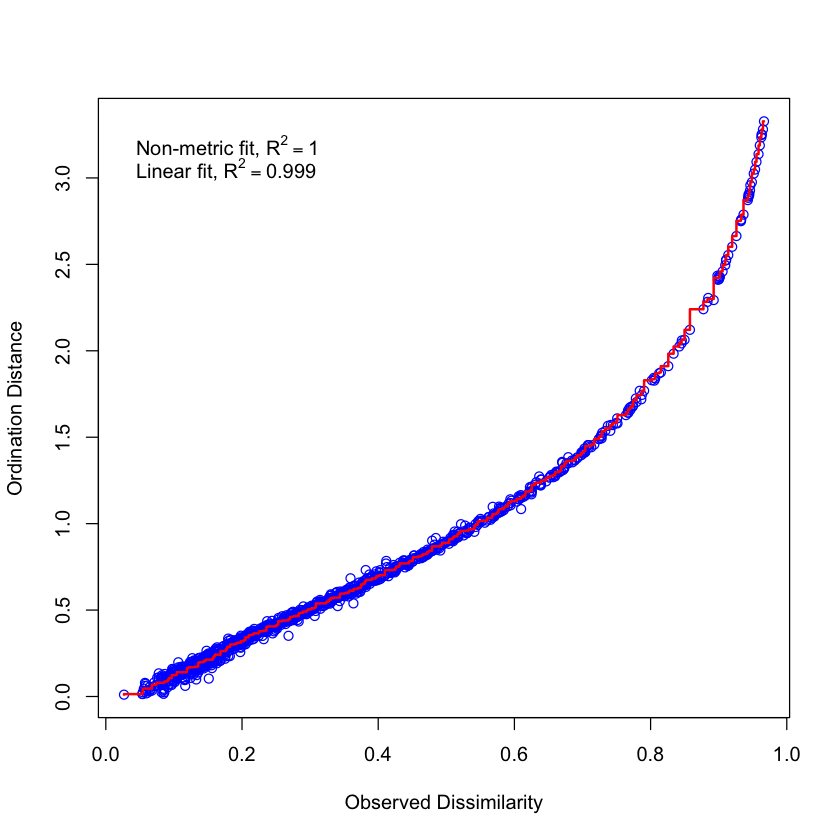

In [20]:
#Transpose the file so that rows and columns are switched 
SRM.data.mean.t <- t(SRM.data.mean) # t() function transposes, removes PRTC transitions & extraneous info

#Replace NA cells with 0; metaMDS() does not handle NA's
SRM.data.mean.t.noNA <- SRM.data.mean.t
SRM.data.mean.t.noNA[is.na(SRM.data.mean.t.noNA)] <- 0

#Make MDS dissimilarity matrix
SRM.mean.nmds <- metaMDS(SRM.data.mean.t.noNA, distance = 'bray', k = 2, trymax = 3000, autotransform = FALSE, trace=0)
stressplot(SRM.mean.nmds) 

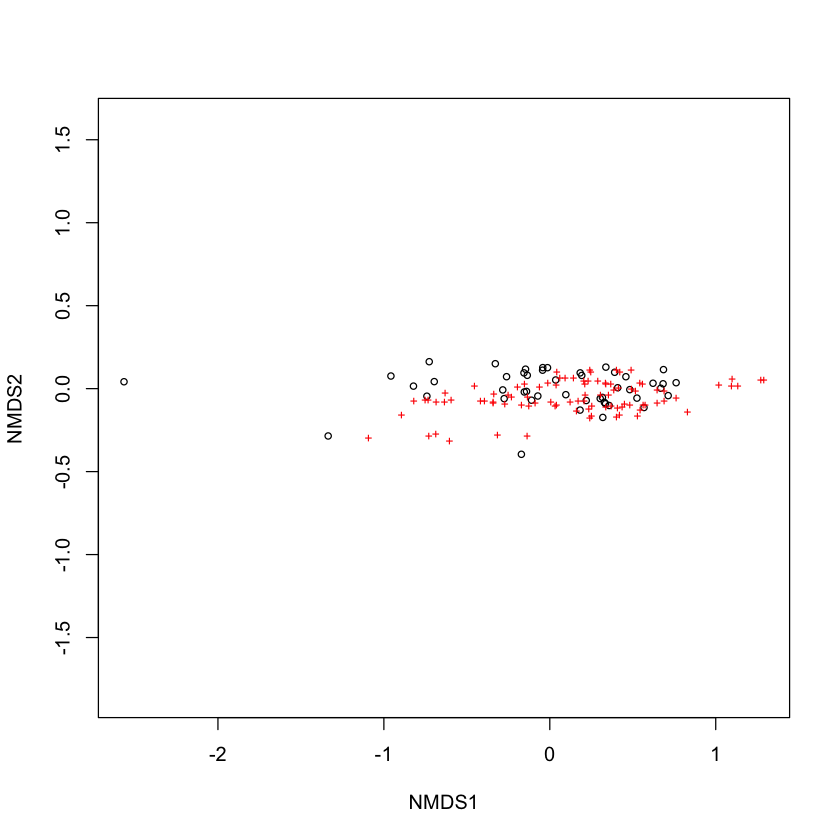

In [21]:
plot(SRM.mean.nmds)
# site (sample) in black circle
# species (variable) in red ticks

#### In the following script for NMDS plots the `png()` and `dev.off()` commands are commented out so the plots are displayed in this notebook. 

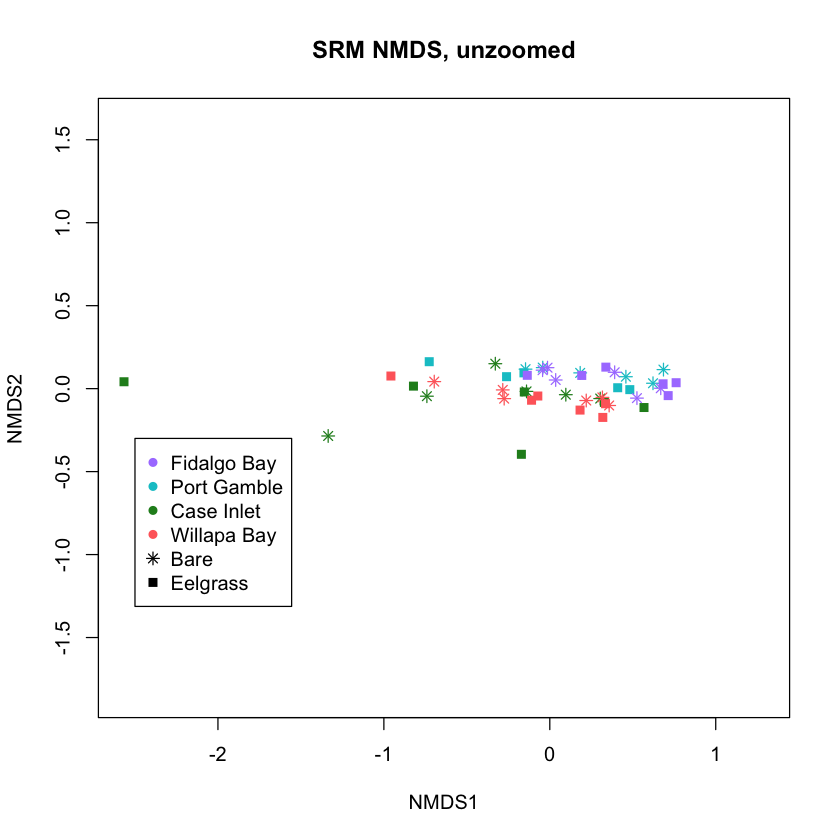

In [23]:
# make figure with sample annotations https://stat.ethz.ch/pipermail/r-sig-ecology/2011-September/002371.html
SRM.nmds.mean.samples <- scores(SRM.mean.nmds, display = "sites")

### Plot using ordiplot()
# requires library(RColorBrewer)
marker = c("indianred1", "forestgreen", "turquoise3", "mediumpurple1")

# png("Analyses/2017-September_SRM-results/2017-09-04_NotNORM-SRM-NMDS-plot.png")
ordiplot(SRM.mean.nmds, type="n", main="SRM NMDS, unzoomed")
points(SRM.nmds.mean.samples[c(CI.B.samples),], col=marker[2], pch=8)
points(SRM.nmds.mean.samples[c(CI.E.samples),], col=marker[2], pch=15)
points(SRM.nmds.mean.samples[c(PG.B.samples),], col=marker[3], pch=8)
points(SRM.nmds.mean.samples[c(PG.E.samples),], col=marker[3], pch=15)
points(SRM.nmds.mean.samples[c(WB.B.samples),], col=marker[1], pch=8)
points(SRM.nmds.mean.samples[c(WB.E.samples),], col=marker[1], pch=15)
points(SRM.nmds.mean.samples[c(FB.B.samples),], col=marker[4], pch=8)
points(SRM.nmds.mean.samples[c(FB.E.samples),], col=marker[4], pch=15)
legend(-2.5,-0.3, pch=c(rep(16,4), 8, 15), legend=c("Fidalgo Bay", "Port Gamble", 'Case Inlet', "Willapa Bay", "Bare", "Eelgrass"), col=c(marker[4], marker[3], marker[2], marker[1], "black", "black"))
# dev.off()

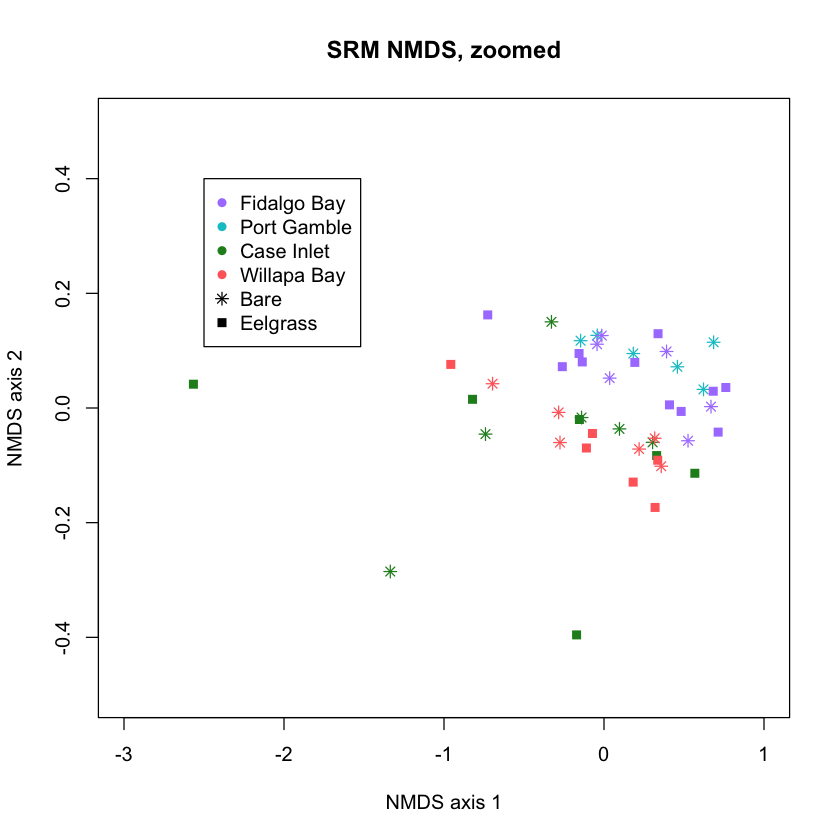

In [24]:
# Create plot with forced aspect ratio to zoom in ### 
# png("Analyses/2017-September_SRM-results/2017-09-04_NotNORM-SRM-NMDS-plot-zoomed.png")
plot.default(x=NULL, y=NULL, type="n", xlab="NMDS axis 1", ylab="NMDS axis 2", xlim=c(-3,1), ylim=c(-0.5,0.5), asp=NA, main="SRM NMDS, zoomed")
points(SRM.nmds.mean.samples[c(CI.B.samples),], col=marker[2], pch=8)
points(SRM.nmds.mean.samples[c(CI.E.samples),], col=marker[2], pch=15)
points(SRM.nmds.mean.samples[c(PG.B.samples),], col=marker[3], pch=8)
points(SRM.nmds.mean.samples[c(PG.E.samples),], col=marker[4], pch=15)
points(SRM.nmds.mean.samples[c(WB.B.samples),], col=marker[1], pch=8)
points(SRM.nmds.mean.samples[c(WB.E.samples),], col=marker[1], pch=15)
points(SRM.nmds.mean.samples[c(FB.B.samples),], col=marker[4], pch=8)
points(SRM.nmds.mean.samples[c(FB.E.samples),], col=marker[4], pch=15)
legend(-2.5,0.4, pch=c(rep(16,4), 8, 15), legend=c("Fidalgo Bay", "Port Gamble", 'Case Inlet', "Willapa Bay", "Bare", "Eelgrass"), col=c(marker[4], marker[3], marker[2], marker[1], "black", "black"))
# dev.off()

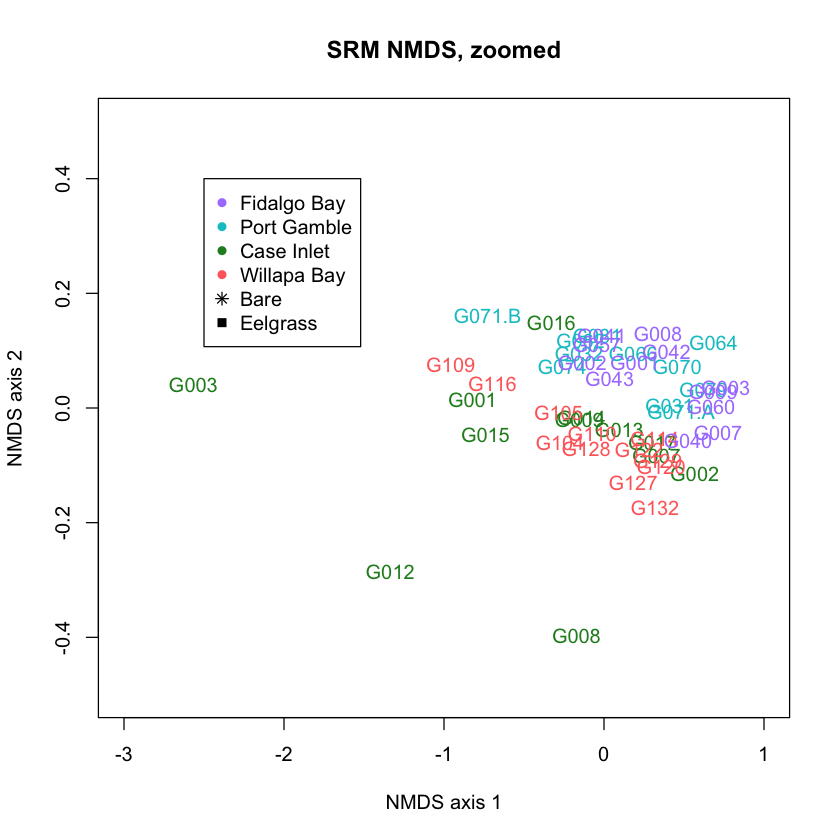

In [25]:
### Create plot with sample #'s to ID outliers AND with forced aspect ratio to zoom in
# png("Analyses/2017-September_SRM-results/2017-09-04_NotNORM-SRM-NMDS-plot-sample-labels.png")
plot.default(x=NULL, y=NULL, type="n", xlab="NMDS axis 1", ylab="NMDS axis 2", xlim=c(-3,1), ylim=c(-0.5,0.5), asp=NA, main="SRM NMDS, zoomed")
text(SRM.nmds.mean.samples[c(CI.B.samples),], label=rownames(SRM.nmds.mean.samples[c(CI.B.samples),]), col=marker[2], pch=8)
text(SRM.nmds.mean.samples[c(CI.E.samples),], label=rownames(SRM.nmds.mean.samples[c(CI.E.samples),]),  col=marker[2], pch=15)
text(SRM.nmds.mean.samples[c(PG.B.samples),], label=rownames(SRM.nmds.mean.samples[c(PG.B.samples),]),  col=marker[3], pch=8)
text(SRM.nmds.mean.samples[c(PG.E.samples),], label=rownames(SRM.nmds.mean.samples[c(PG.E.samples),]),  col=marker[3], pch=15)
text(SRM.nmds.mean.samples[c(WB.B.samples),], label=rownames(SRM.nmds.mean.samples[c(WB.B.samples),]),  col=marker[1], pch=8)
text(SRM.nmds.mean.samples[c(WB.E.samples),], label=rownames(SRM.nmds.mean.samples[c(WB.E.samples),]),  col=marker[1], pch=15)
text(SRM.nmds.mean.samples[c(FB.B.samples),], label=rownames(SRM.nmds.mean.samples[c(FB.B.samples),]),  col=marker[4], pch=8)
text(SRM.nmds.mean.samples[c(FB.E.samples),], label=rownames(SRM.nmds.mean.samples[c(CI.E.samples),]),  col=marker[4], pch=15)
legend(-2.5,0.4, pch=c(rep(16,4), 8, 15), legend=c("Fidalgo Bay", "Port Gamble", 'Case Inlet', "Willapa Bay", "Bare", "Eelgrass"), col=c(marker[4], marker[3], marker[2], marker[1], "black", "black"))
# dev.off()

Warning message in plot.window(...):
“"width" is not a graphical parameter”Warning message in plot.window(...):
“"height" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"width" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"height" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"width" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"height" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"width" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"height" is not a graphical parameter”Warning message in box(...):
“"width" is not a graphical parameter”Warning message in box(...):
“"height" is not a graphical parameter”Warning message in title(...):
“"width" is not a graphical parameter”Warning message in title(...):
“"height" is not a gr

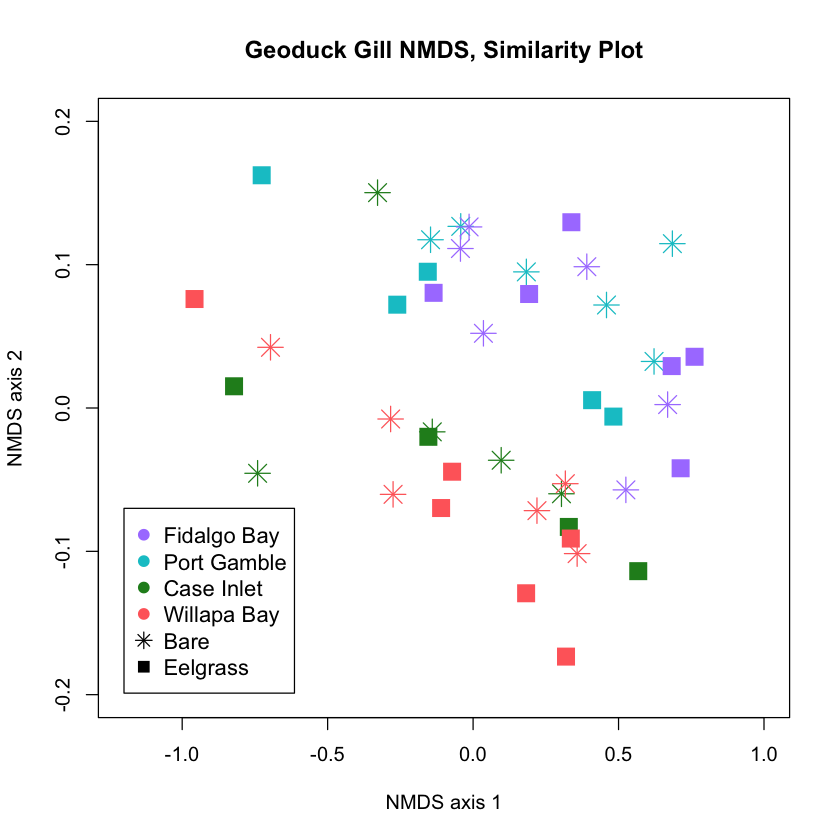

In [26]:
#### Create plot with forced aspect ratio to zoom in, not including CI outliers ### 
# png("Analyses/2017-September_SRM-results/2017-09-04_NotNORM-SRM-NMDS-plot-zoomed-no-outliers-eelbare.png")
plot.default(x=NULL, y=NULL, type="n", xlab="NMDS axis 1", ylab="NMDS axis 2", xlim=c(-1.2,1), ylim=c(-0.2,0.2), asp=NA, main="Geoduck Gill NMDS, Similarity Plot", width=600,height=600)
points(SRM.nmds.mean.samples[c(CI.B.samples),], col=marker[2], pch=8, cex=2)
points(SRM.nmds.mean.samples[c(CI.E.samples),], col=marker[2], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(PG.B.samples),], col=marker[3], pch=8, cex=2)
points(SRM.nmds.mean.samples[c(PG.E.samples),], col=marker[3], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(WB.B.samples),], col=marker[1], pch=8, cex=2)
points(SRM.nmds.mean.samples[c(WB.E.samples),], col=marker[1], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(FB.B.samples),], col=marker[4], pch=8, cex=2)
points(SRM.nmds.mean.samples[c(FB.E.samples),], col=marker[4], pch=15, cex=2)
legend(-1.2,-0.07, pch=c(rep(16,4), 8, 15), cex=1.1, pt.cex=1.3, legend=c("Fidalgo Bay", "Port Gamble", 'Case Inlet', "Willapa Bay", "Bare", "Eelgrass"), col=c(marker[4], marker[3], marker[2], marker[1], "black", "black"))
# dev.off()

Warning message in plot.window(...):
“"width" is not a graphical parameter”Warning message in plot.window(...):
“"height" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"width" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"height" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"width" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"height" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"width" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"height" is not a graphical parameter”Warning message in box(...):
“"width" is not a graphical parameter”Warning message in box(...):
“"height" is not a graphical parameter”Warning message in title(...):
“"width" is not a graphical parameter”Warning message in title(...):
“"height" is not a gr

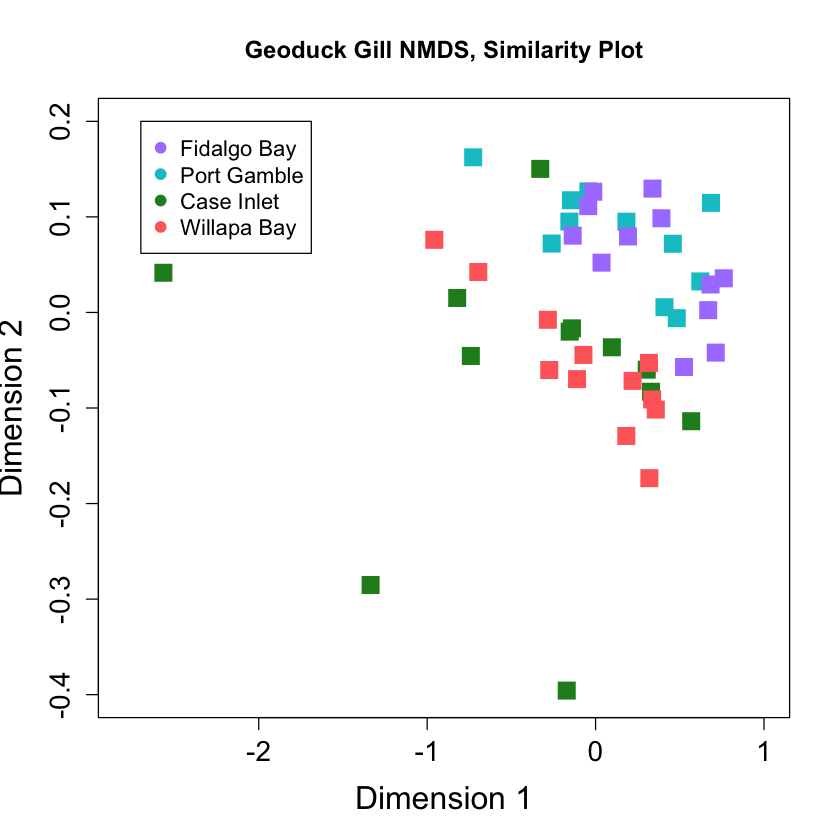

In [27]:
#### Create plot with forced aspect ratio to zoom in, no eel/bare separation ### 
# png("Analyses/2017-September_SRM-results/2017-09-04_NotNORM-SRM-NMDS-plot-zoomed.png")
plot.default(x=NULL, y=NULL, type="n", xlab="Dimension 1", ylab="Dimension 2", xlim=c(-2.8,1), ylim=c(-0.4,0.2), asp=NA, main="Geoduck Gill NMDS, Similarity Plot", width=600,height=600, cex.axis=1.4, cex.lab=1.6)
points(SRM.nmds.mean.samples[c(CI.B.samples),], col=marker[2], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(CI.E.samples),], col=marker[2], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(PG.B.samples),], col=marker[3], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(PG.E.samples),], col=marker[3], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(WB.B.samples),], col=marker[1], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(WB.E.samples),], col=marker[1], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(FB.B.samples),], col=marker[4], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(FB.E.samples),], col=marker[4], pch=15, cex=2)
legend(-2.7,0.2, pch=c(rep(16,4)), cex=1.1, pt.cex=1.3, legend=c("Fidalgo Bay", "Port Gamble", 'Case Inlet', "Willapa Bay"), col=c(marker[4], marker[3], marker[2], marker[1]))
# dev.off()

Warning message in plot.window(...):
“"width" is not a graphical parameter”Warning message in plot.window(...):
“"height" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"width" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"height" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"width" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"height" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"width" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"height" is not a graphical parameter”Warning message in box(...):
“"width" is not a graphical parameter”Warning message in box(...):
“"height" is not a graphical parameter”Warning message in title(...):
“"width" is not a graphical parameter”Warning message in title(...):
“"height" is not a gr

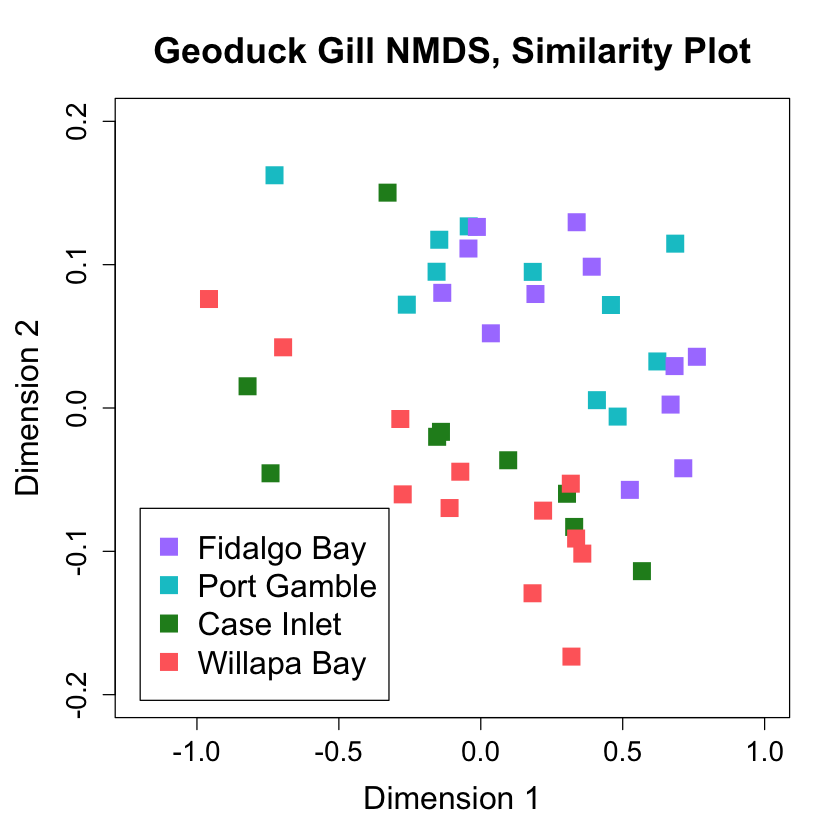

In [28]:
#### Create plot with forced aspect ratio to zoom in, no eel/bare separation, no outliers ### 
# png("Analyses/2017-September_SRM-results/2017-09-04_NotNORM-SRM-NMDS-plot-zoomed-no-outliers.png")
par(mar=c(5.1,4.8,4.1,2.1))
plot.default(x=NULL, y=NULL, type="n", xlab="Dimension 1", ylab="Dimension 2",  xlim=c(-1.2,1), ylim=c(-0.2,0.2), asp=NA, main="Geoduck Gill NMDS, Similarity Plot", width=600,height=600, cex.axis=1.4, cex.lab=1.6, cex.main=1.8)
points(SRM.nmds.mean.samples[c(CI.B.samples),], col=marker[2], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(CI.E.samples),], col=marker[2], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(PG.B.samples),], col=marker[3], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(PG.E.samples),], col=marker[3], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(WB.B.samples),], col=marker[1], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(WB.E.samples),], col=marker[1], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(FB.B.samples),], col=marker[4], pch=15, cex=2)
points(SRM.nmds.mean.samples[c(FB.E.samples),], col=marker[4], pch=15, cex=2)
legend(-1.2,-0.07, pch=c(rep(15,4)), cex=1.6, pt.cex=2, legend=c("Fidalgo Bay", "Port Gamble", 'Case Inlet', "Willapa Bay"), col=c(marker[4], marker[3], marker[2], marker[1]))
# dev.off()

#### CREATE NMDS PLOT, MEAN OF TECH REPS - LOG TRANSFORMED ########

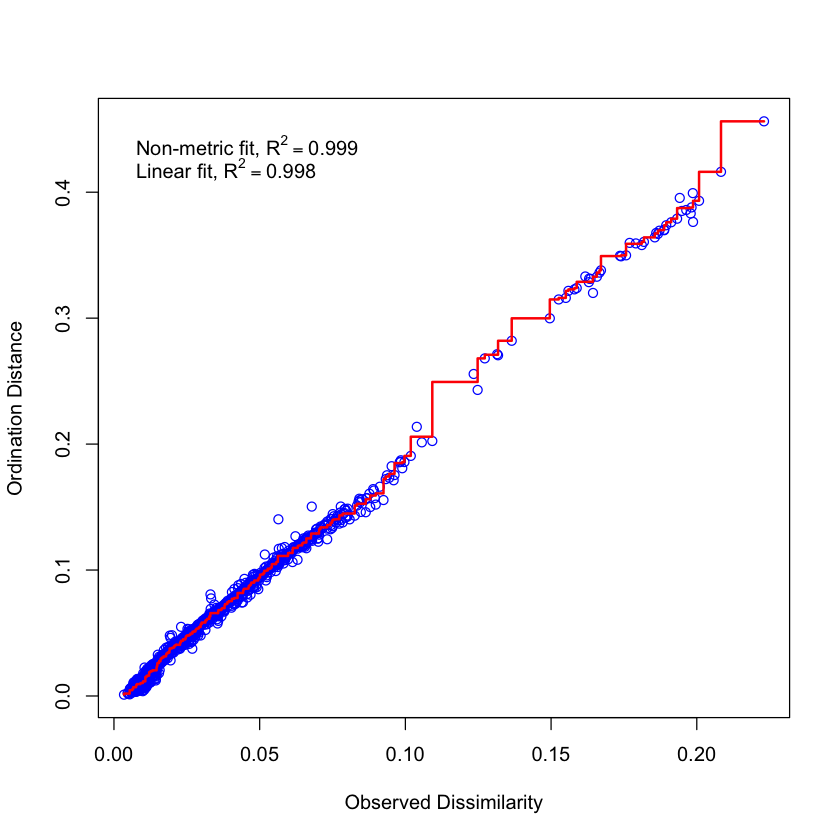

In [40]:
#Transpose the file so that rows and columns are switched and normalized by log(x+1)
SRM.data.mean.t.log <- SRM.data.mean.t
SRM.data.mean.t.log[is.na(SRM.data.mean.t.log)] <- 0
SRM.data.mean.t.log <- (SRM.data.mean.t.log+1)
SRM.data.mean.t.log <- data.trans(SRM.data.mean.t.log, method = 'log', plot = FALSE)

#Make MDS dissimilarity matrix
SRM.mean.log.nmds <- metaMDS(SRM.data.mean.t.log, distance = 'bray', k = 2, trymax = 3000, autotransform = FALSE, trace=0)
stressplot(SRM.mean.log.nmds) 

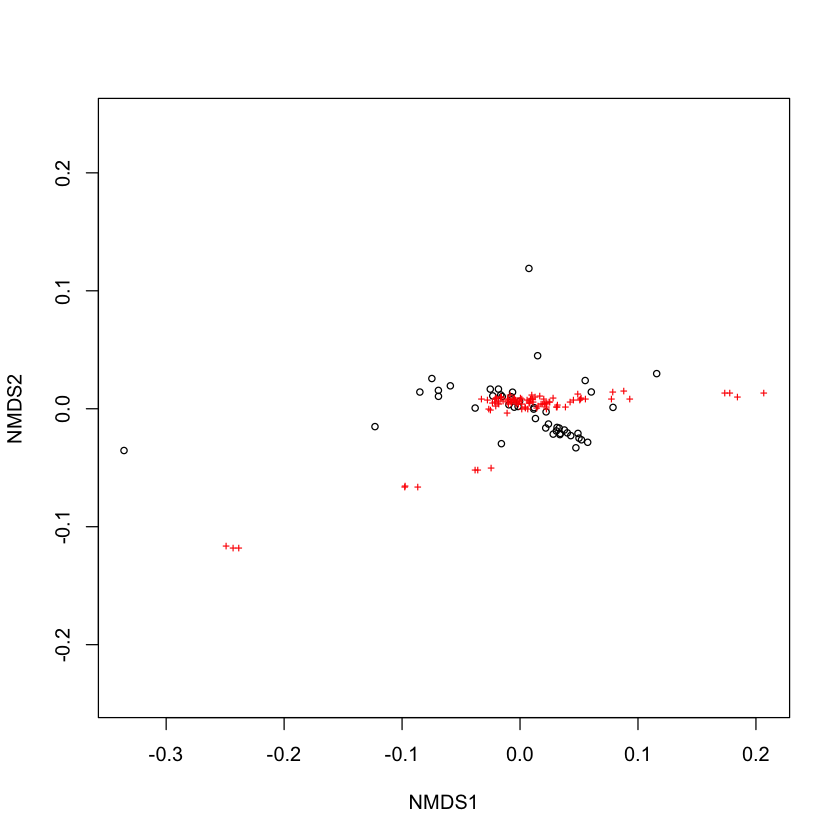

In [41]:
plot(SRM.mean.log.nmds)
# site (sample) in black circle
# species (variable) in red ticks

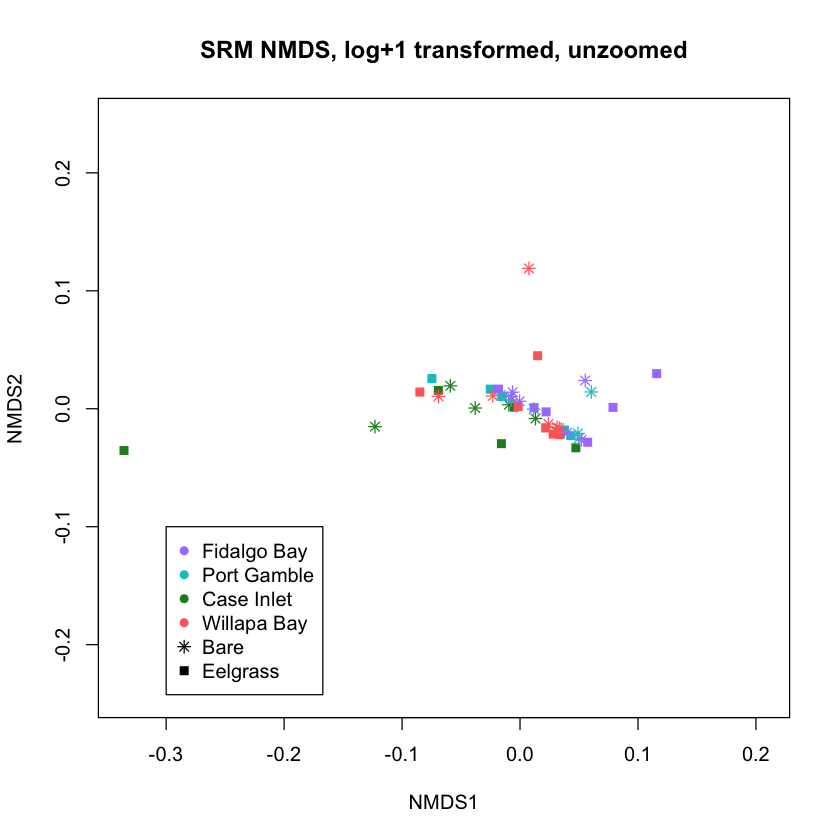

In [42]:
SRM.nmds.mean.log.samples <- scores(SRM.mean.log.nmds, display = "sites")

#png("Analyses/2017-September_SRM-results/2017-09-04_NotNORM-SRM-NMDS-log-plot.png")
ordiplot(SRM.mean.log.nmds, type="n", main="SRM NMDS, log+1 transformed, unzoomed")
points(SRM.nmds.mean.log.samples[c(CI.B.samples),], col=marker[2], pch=8)
points(SRM.nmds.mean.log.samples[c(CI.E.samples),], col=marker[2], pch=15)
points(SRM.nmds.mean.log.samples[c(PG.B.samples),], col=marker[3], pch=8)
points(SRM.nmds.mean.log.samples[c(PG.E.samples),], col=marker[3], pch=15)
points(SRM.nmds.mean.log.samples[c(WB.B.samples),], col=marker[1], pch=8)
points(SRM.nmds.mean.log.samples[c(WB.E.samples),], col=marker[1], pch=15)
points(SRM.nmds.mean.log.samples[c(FB.B.samples),], col=marker[4], pch=8)
points(SRM.nmds.mean.log.samples[c(FB.E.samples),], col=marker[4], pch=15)
legend(-.3,-0.1, pch=c(rep(16,4), 8, 15), legend=c("Fidalgo Bay", "Port Gamble", 'Case Inlet', "Willapa Bay", "Bare", "Eelgrass"), col=c(marker[4], marker[3], marker[2], marker[1], "black", "black"))
#dev.off()

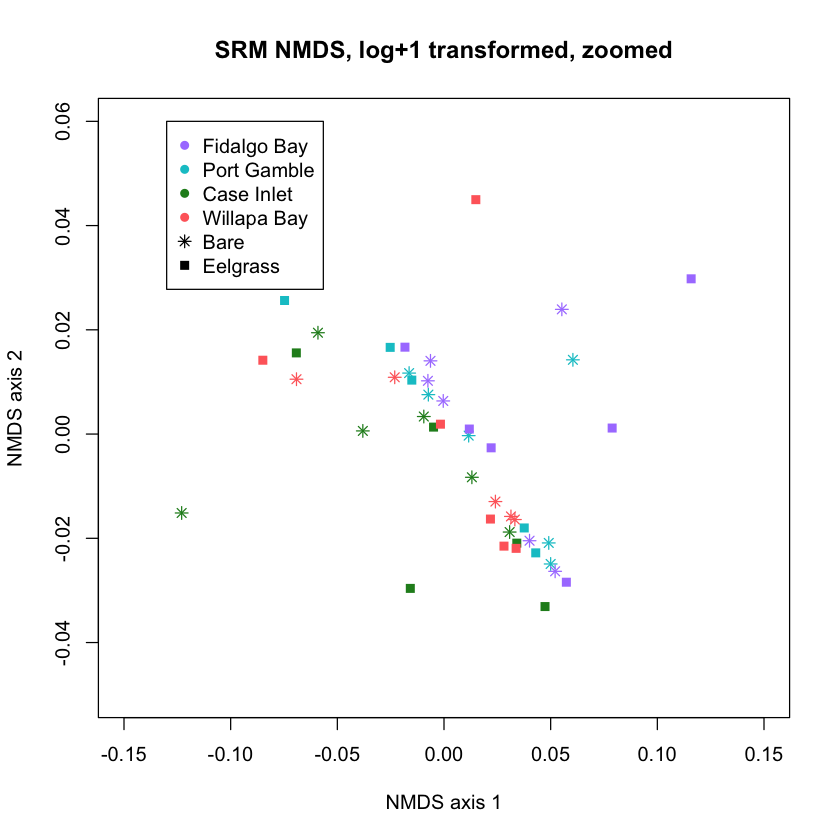

In [45]:
#### Create plot with forced aspect ratio to zoom in ### 

#png("Analyses/2017-September_SRM-results/2017-09-04_NotNORM-SRM-NMDS-plot-log-zoomed.png")
plot.default(x=NULL, y=NULL, type="n", xlab="NMDS axis 1", ylab="NMDS axis 2", xlim=c(-.15,.15), ylim=c(-0.05,.06), asp=NA, main="SRM NMDS, log+1 transformed, zoomed")
points(SRM.nmds.mean.log.samples[c(CI.B.samples),], col=marker[2], pch=8)
points(SRM.nmds.mean.log.samples[c(CI.E.samples),], col=marker[2], pch=15)
points(SRM.nmds.mean.log.samples[c(PG.B.samples),], col=marker[3], pch=8)
points(SRM.nmds.mean.log.samples[c(PG.E.samples),], col=marker[3], pch=15)
points(SRM.nmds.mean.log.samples[c(WB.B.samples),], col=marker[1], pch=8)
points(SRM.nmds.mean.log.samples[c(WB.E.samples),], col=marker[1], pch=15)
points(SRM.nmds.mean.log.samples[c(FB.B.samples),], col=marker[4], pch=8)
points(SRM.nmds.mean.log.samples[c(FB.E.samples),], col=marker[4], pch=15)
legend(-.13,0.06, pch=c(rep(16,4), 8, 15), legend=c("Fidalgo Bay", "Port Gamble", 'Case Inlet', "Willapa Bay", "Bare", "Eelgrass"), col=c(marker[4], marker[3], marker[2], marker[1], "black", "black"))
#dev.off()

### RUN ANALYSIS OF SIMILARITY (ANOSIM) ON DIFFERENT ITERATIONS OF DATA

In [29]:
## PREPARE DATA FOR ANOSIM 
CI.b <- data.frame(SAMPLE=CI.B.samples, SITE=rep("CI", times=length(CI.B.samples)), TREATMENT=rep("Bare", times=length(CI.B.samples)), BOTH=rep("CI-Bare", times=length(CI.B.samples)))
CI.e <- data.frame(SAMPLE=CI.E.samples, SITE=rep("CI", times=length(CI.E.samples)), TREATMENT=rep("Eelgrass", times=length(CI.E.samples)), BOTH=rep("CI-Eel", times=length(CI.E.samples)))
PG.b <- data.frame(SAMPLE=PG.B.samples, SITE=rep("PG", times=length(PG.B.samples)), TREATMENT=rep("Bare", times=length(PG.B.samples)), BOTH=rep("PG-Bare", times=length(PG.B.samples)))
PG.e <- data.frame(SAMPLE=PG.E.samples, SITE=rep("PG", times=length(PG.E.samples)), TREATMENT=rep("Eelgrass", times=length(PG.E.samples)), BOTH=rep("PG-Eel", times=length(PG.E.samples)))
WB.b <- data.frame(SAMPLE=WB.B.samples, SITE=rep("WB", times=length(WB.B.samples)), TREATMENT=rep("Bare", times=length(WB.B.samples)), BOTH=rep("WB-Bare", times=length(WB.B.samples)))
WB.e <- data.frame(SAMPLE=WB.E.samples, SITE=rep("WB", times=length(WB.E.samples)), TREATMENT=rep("Eelgrass", times=length(WB.E.samples)), BOTH=rep("WB-Eel", times=length(WB.E.samples)))
FB.b <- data.frame(SAMPLE=FB.B.samples, SITE=rep("FB", times=length(FB.B.samples)), TREATMENT=rep("Bare", times=length(FB.B.samples)), BOTH=rep("FB-Bare", times=length(FB.B.samples)))
FB.e <- data.frame(SAMPLE=FB.E.samples, SITE=rep("FB", times=length(FB.E.samples)), TREATMENT=rep("Eelgrass", times=length(FB.E.samples)), BOTH=rep("FB-Eel", times=length(FB.E.samples)))
FB.e #check that format is correct
samples4anosim <- rbind.data.frame(CI.b, CI.e, PG.b, PG.e, WB.b, WB.e, FB.e, FB.b, stringsAsFactors = TRUE)
samples4anosim$SAMPLE <- as.character(samples4anosim$SAMPLE)

SAMPLE,SITE,TREATMENT,BOTH
G045,FB,Eelgrass,FB-Eel
G047,FB,Eelgrass,FB-Eel
G049,FB,Eelgrass,FB-Eel
G053,FB,Eelgrass,FB-Eel
G054,FB,Eelgrass,FB-Eel
G055,FB,Eelgrass,FB-Eel


### ANOSIM of data 
**Not log transformed, no zeros in data (instead, ignore NAs)**

In [31]:
data4anosim <- cbind.data.frame(SRM.data.mean.t[order(rownames(SRM.data.mean.t)),], samples4anosim[order(samples4anosim$SAMPLE),])
data4anosim$SITE <- as.factor(data4anosim$SITE)
data4anosim$TREATMENT <- as.factor(data4anosim$TREATMENT)
data4anosim$BOTH <- as.factor(data4anosim$BOTH)


Call:
anosim(dat = sdms.vegdist, grouping = data4anosim$SITE, permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: 0.06494 
      Significance: 0.041979 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0427 0.0607 0.0765 0.0984 

Dissimilarity ranks between and within classes:
        0%    25%   50%    75% 100%   N
Between  1 282.75 545.5 822.25 1081 828
CI       2 490.50 712.5 947.50 1075  66
PG       4 207.50 558.0 755.50  991  55
WB       5 116.75 470.5 686.50  973  66
FB       7 157.75 383.5 663.00  851  66

Press return for next plot 


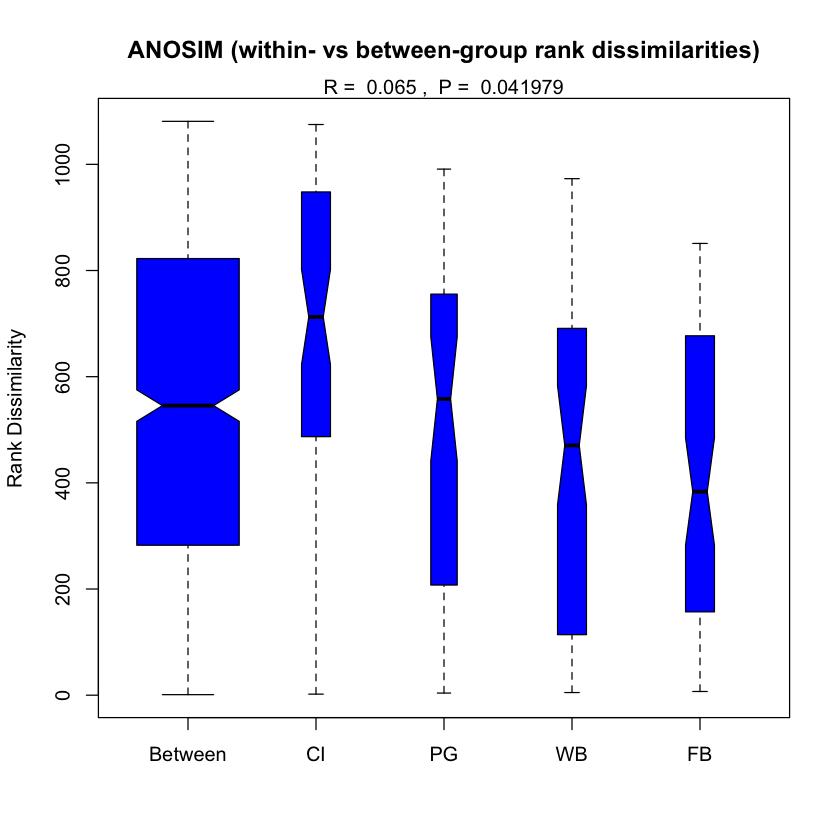

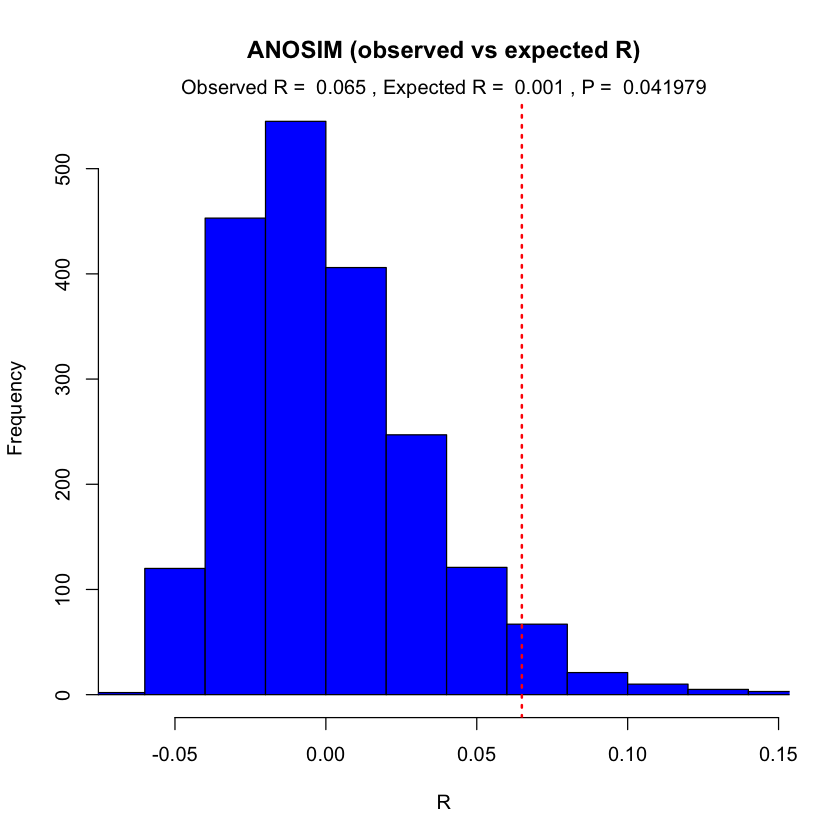

In [32]:
# ANOSIM between sites
sdms.vegdist <- vegdist(data4anosim[,-(ncol(data4anosim)-3):-(ncol(data4anosim))], 'bray', na.rm=TRUE) #this also removes the last 4 columns of data, since they are factors
site.anos<-anosim(sdms.vegdist, grouping=data4anosim$SITE, permutations = 2000)
summary(site.anos)
plot(site.anos)


Call:
anosim(dat = sdms.vegdist, grouping = data4anosim$TREATMENT,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: -0.01657 
      Significance: 0.69465 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0347 0.0531 0.0693 0.0871 

Dissimilarity ranks between and within classes:
         0%   25%   50%    75% 100%   N
Between   2 259.5 536.0 808.25 1078 552
Bare      3 246.5 476.5 755.50 1039 276
Eelgrass  1 327.0 605.0 860.00 1081 253

Press return for next plot 


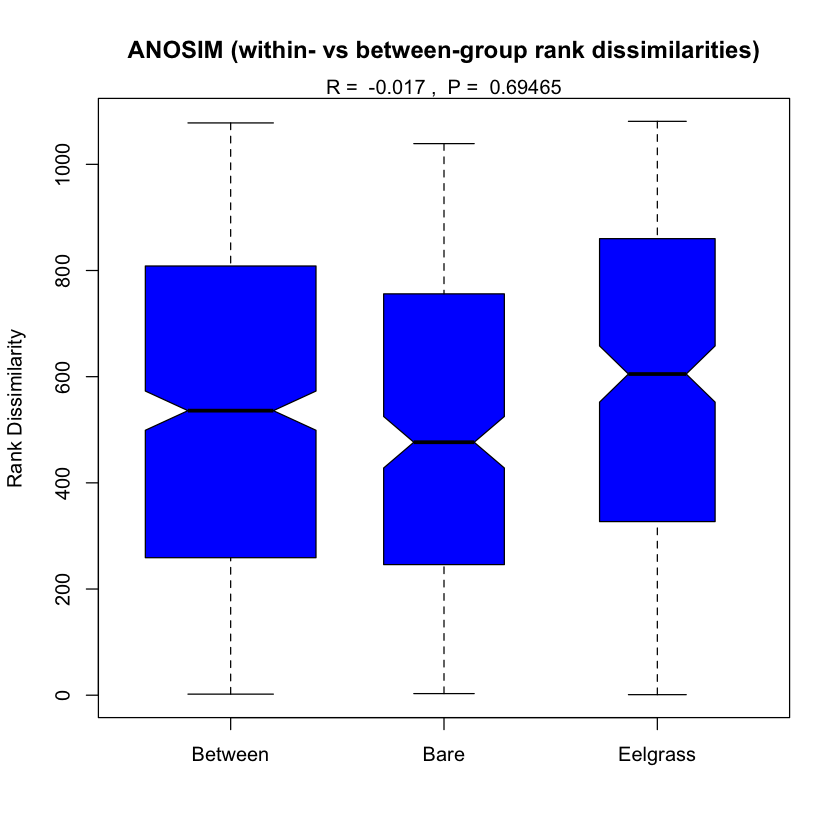

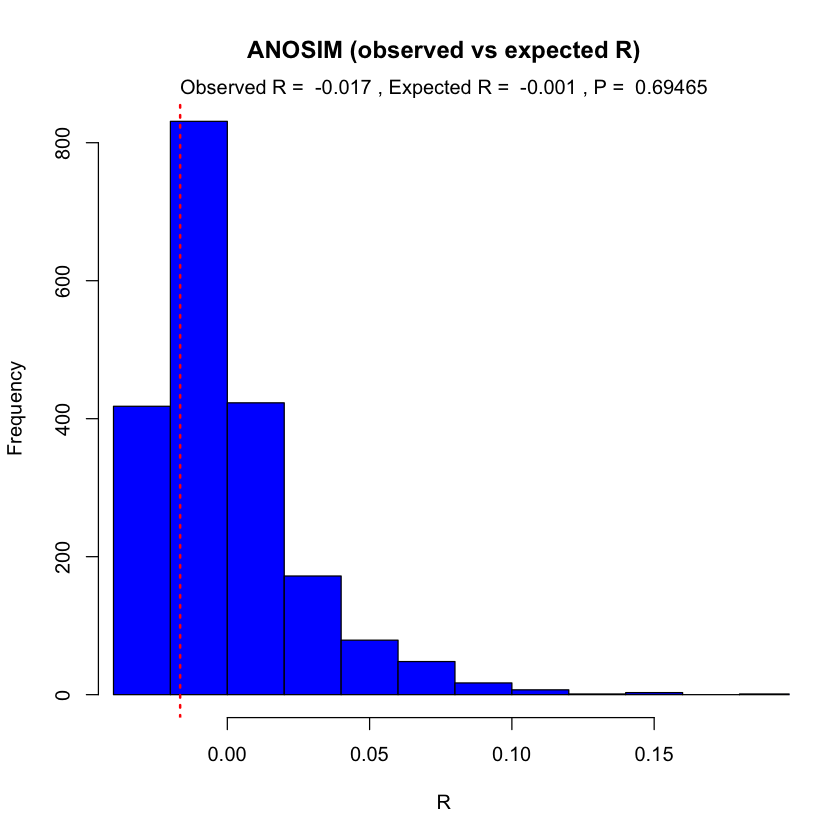

In [33]:
# ANOSIM between treatments
treatment.anos<-anosim(sdms.vegdist, grouping=data4anosim$TREATMENT, permutations = 2000)
summary(treatment.anos)
plot(treatment.anos)


Call:
anosim(dat = sdms.vegdist, grouping = data4anosim$BOTH, permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: 0.01874 
      Significance: 0.30135 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0632 0.0859 0.1022 0.1250 

Dissimilarity ranks between and within classes:
         0%    25%   50%     75% 100%   N
Between   1 271.25 540.5  812.75 1081 966
CI-Bare 154 463.50 665.0  900.50 1016  15
CI-Eel  252 666.00 792.0 1036.50 1075  15
PG-Bare  33 207.50 476.0  685.00  820  15
PG-Eel   30 523.25 656.0  763.75  951  10
WB-Bare  14 255.00 562.0  677.50  908  15
WB-Eel    5 191.00 447.0  837.00  967  15
FB-Eel    7 210.00 456.0  591.50  851  15
FB-Bare   8 152.50 444.0  607.00  746  15



Warning message in bxp(structure(list(stats = structure(c(1, 271, 540.5, 813, 1081, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”

Press return for next plot 


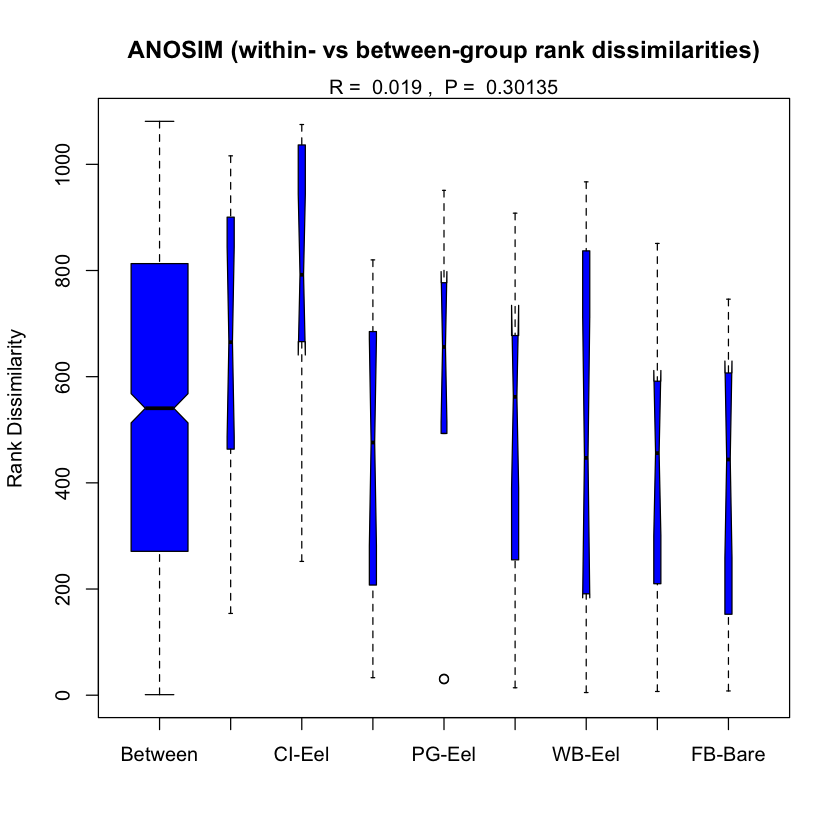

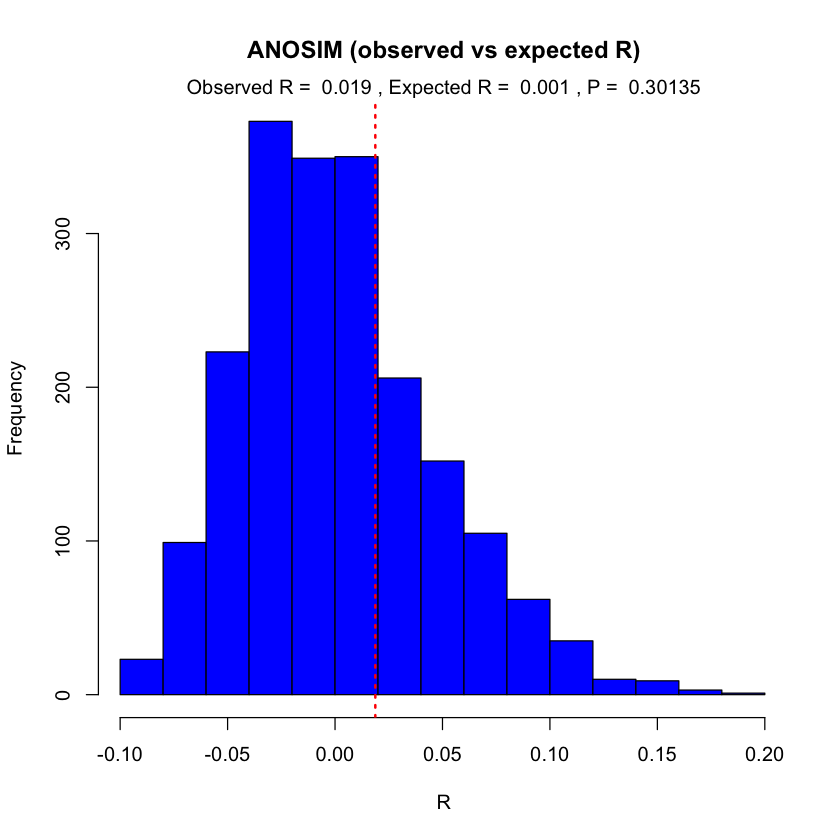

In [34]:
# ANOSIM between both site/treatments
siteANDtreatment.anos<-anosim(sdms.vegdist, grouping=data4anosim$BOTH, permutations = 2000)
summary(siteANDtreatment.anos)
plot(siteANDtreatment.anos)

### ANOSIM of data (not log transformed, including zeros where no peak found)


Call:
anosim(dat = sdms.vegdist, grouping = data4anosim.noNA$SITE,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: 0.06494 
      Significance: 0.041979 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0429 0.0597 0.0774 0.0996 

Dissimilarity ranks between and within classes:
        0%    25%   50%    75% 100%   N
Between  1 282.75 545.5 822.25 1081 828
CI       2 490.50 712.5 947.50 1075  66
PG       4 207.50 558.0 755.50  991  55
WB       5 116.75 470.5 686.50  973  66
FB       7 157.75 383.5 663.00  851  66

Press return for next plot 


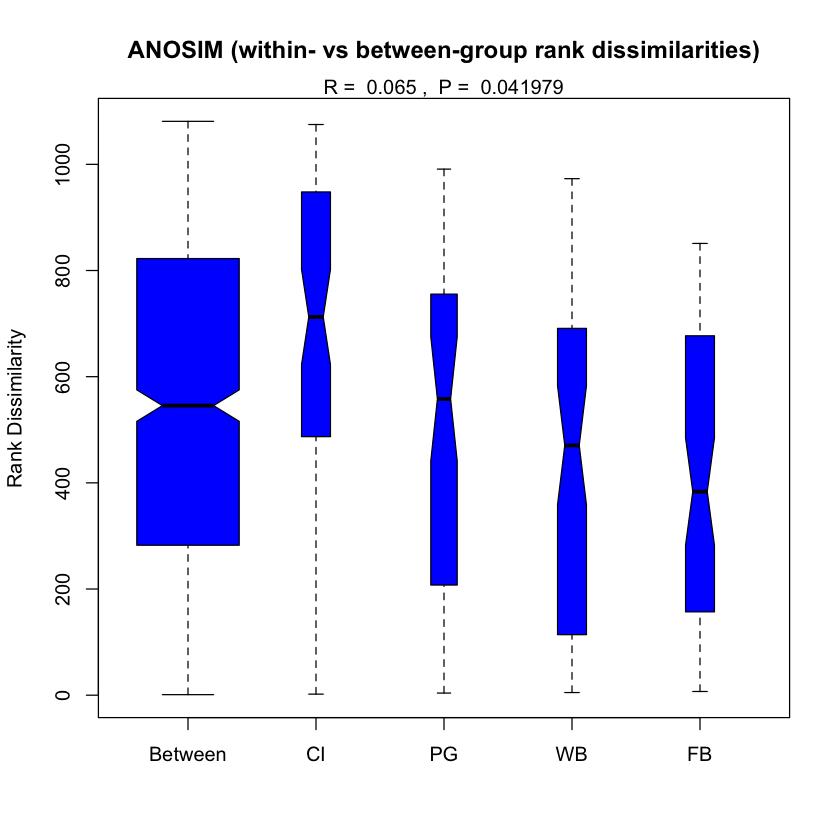

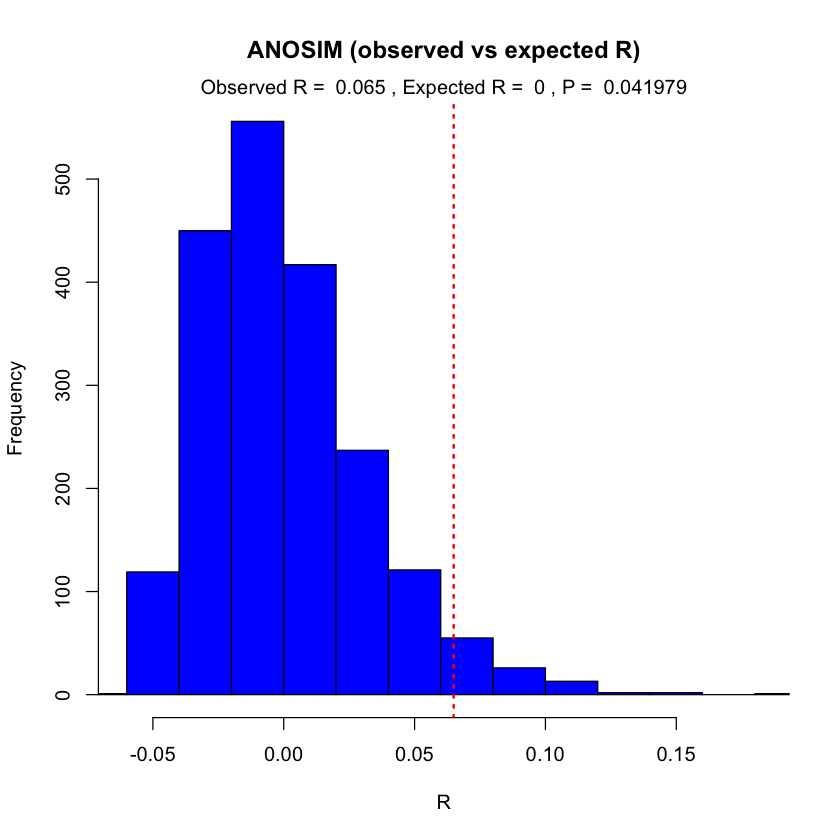

In [35]:
data4anosim.noNA <- cbind.data.frame(SRM.data.mean.t.noNA[order(rownames(SRM.data.mean.t.noNA)),], samples4anosim[order(samples4anosim$SAMPLE),])

# ANOSIM between sites, no NA
sdms.noNA.vegdist <- vegdist(data4anosim.noNA[,-(ncol(data4anosim)-3):-(ncol(data4anosim))], 'bray', na.rm=TRUE)
site.noNA.anos<-anosim(sdms.vegdist, grouping=data4anosim.noNA$SITE, permutations = 2000)
summary(site.noNA.anos)
#png("Analyses/2017-September_SRM-results/2017-09-04_NotNORM-plot-ANOSIM%03d.png")
plot(site.noNA.anos)
#dev.off()


Call:
anosim(dat = sdms.noNA.vegdist, grouping = data4anosim.noNA$TREATMENT,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: -0.01696 
      Significance: 0.70215 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0341 0.0496 0.0677 0.0836 

Dissimilarity ranks between and within classes:
         0%   25%   50%    75% 100%   N
Between   2 258.5 535.5 808.25 1078 552
Bare      3 250.5 477.5 753.00 1039 276
Eelgrass  1 331.0 605.0 859.00 1081 253

Press return for next plot 


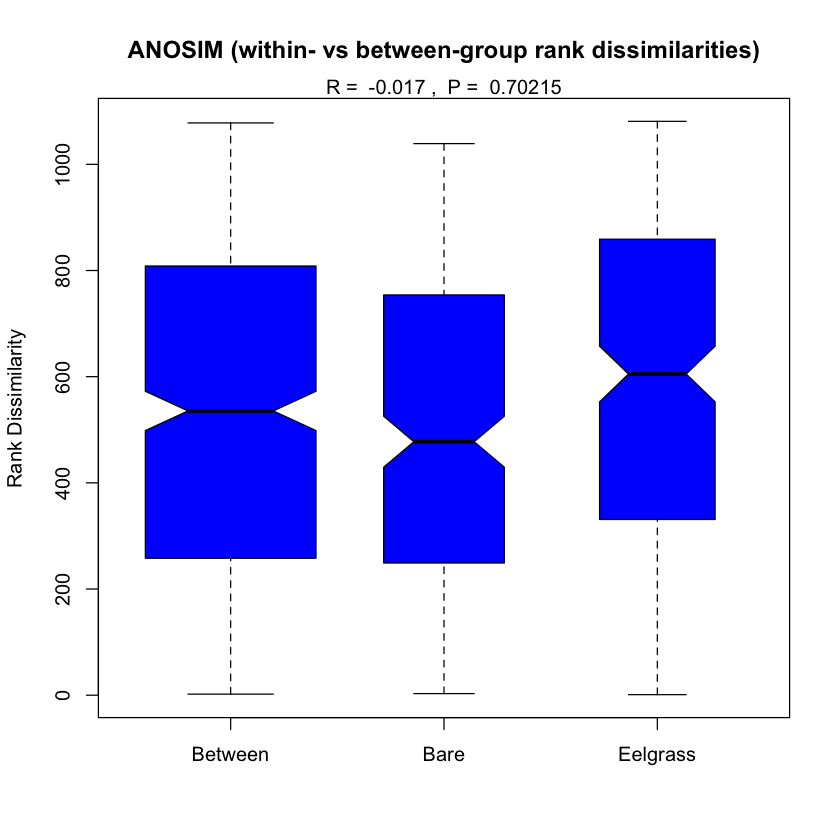

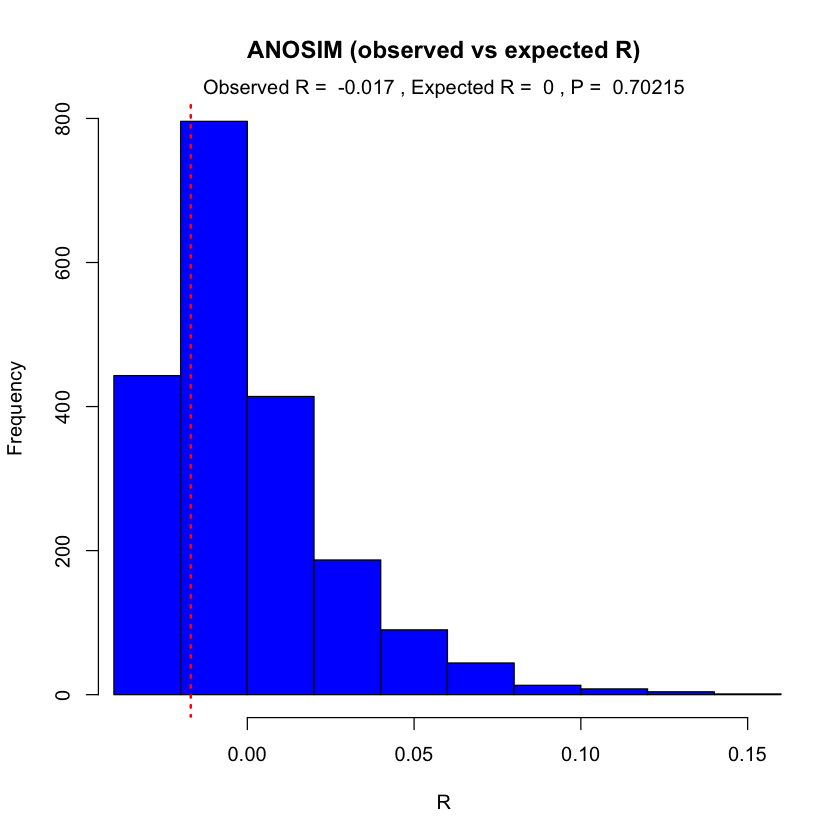

In [36]:
# ANOSIM between treatments, no NA
treatment.noNA.anos<-anosim(sdms.noNA.vegdist, grouping=data4anosim.noNA$TREATMENT, permutations = 2000)
summary(treatment.noNA.anos)
#png("Analyses/2017-September_SRM-results/2017-09-04_NotNORM-plot-ANOSIM%03d.png")
plot(treatment.noNA.anos)
#dev.off()


Call:
anosim(dat = sdms.noNA.vegdist, grouping = data4anosim.noNA$BOTH,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: 0.01847 
      Significance: 0.30235 

Permutation: free
Number of permutations: 2000



Call:
anosim(dat = sdms.noNA.vegdist, grouping = data4anosim.noNA$BOTH,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: 0.01847 
      Significance: 0.30235 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0578 0.0785 0.0919 0.1100 

Dissimilarity ranks between and within classes:
         0%    25%   50%     75% 100%   N
Between   1 271.25 539.5  812.75 1081 966
CI-Bare 152 461.50 662.0  899.50 1016  15
CI-Eel  250 663.00 791.0 1036.50 1075  15
PG-Bare  30 203.50 472.0  681.50  820  15
PG-Eel   27 519.75 654.0  762.00  951  10
WB-Bare  12 252.00 566.0  691.00  908  15
WB-Eel    5 187.50 445.0  835.50  967  15
FB-Eel    6 208.00 455.0  593.50  851  15
FB-Bare   8 147.50 444.0  606.00  745  15



Warning message in bxp(structure(list(stats = structure(c(1, 271, 539.5, 813, 1081, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”

Press return for next plot 


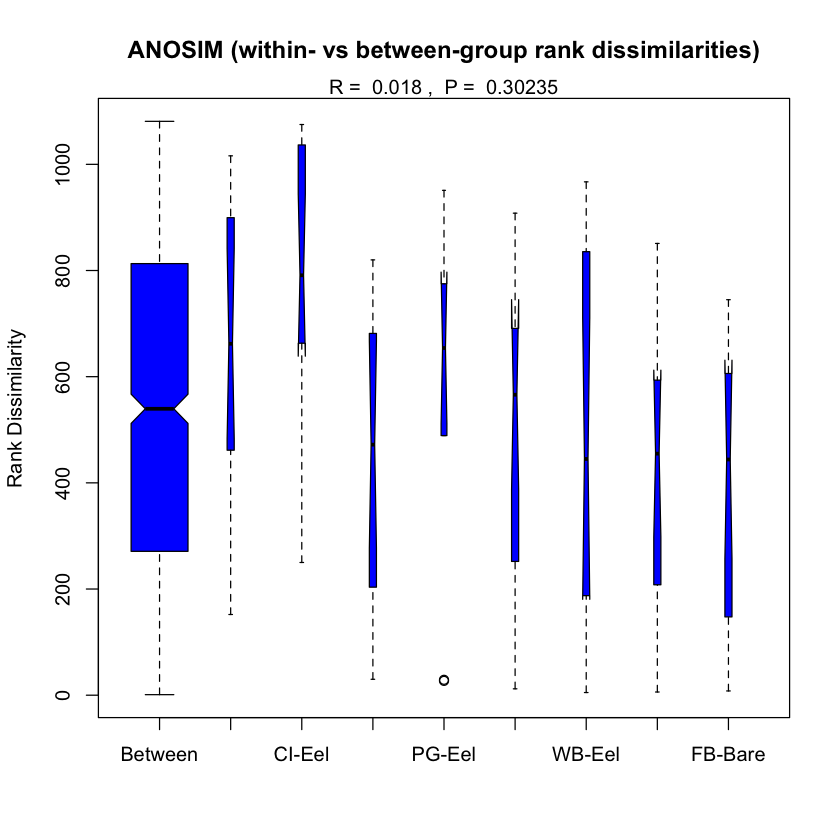

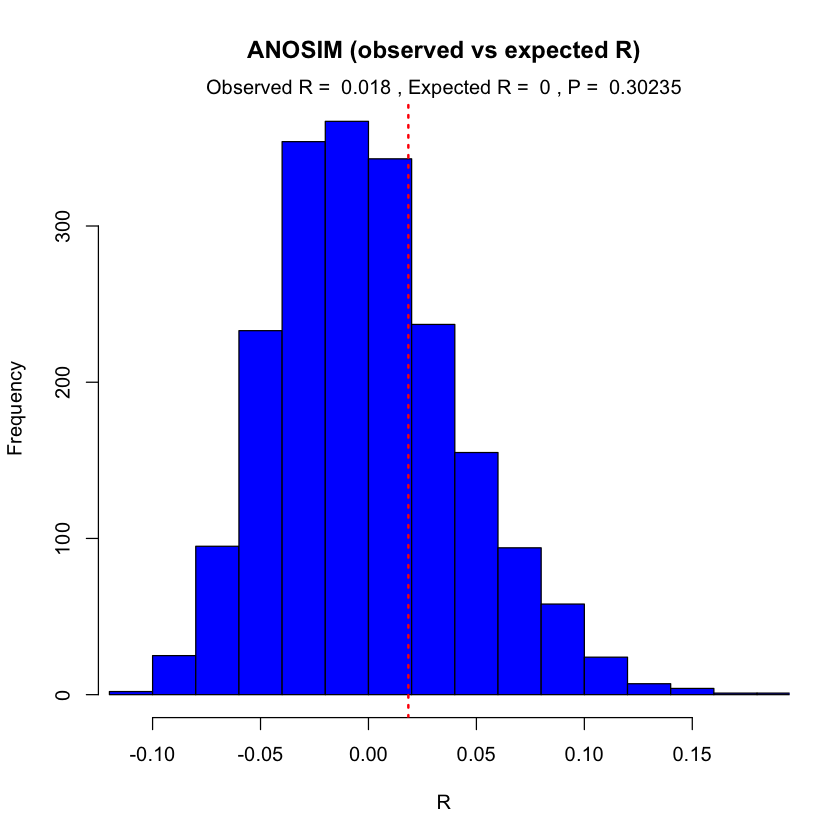

In [37]:
# ANOSIM between both site/treatments, no NA
siteANDtreatment.noNA.anos <- anosim(sdms.noNA.vegdist, grouping=data4anosim.noNA$BOTH, permutations = 2000)
siteANDtreatment.noNA.anos
summary(siteANDtreatment.noNA.anos)
#png("Analyses/2017-September_SRM-results/2017-09-04_NotNORM-plot-ANOSIM%03d.png")
plot(siteANDtreatment.noNA.anos)
#dev.off()

### ANOSIM of data after log+1 transformation  


Call:
anosim(dat = sdms.log.vegdist, grouping = data4anosim.log$SITE,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: 0.007485 
      Significance: 0.33983 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0371 0.0495 0.0671 0.0851 

Dissimilarity ranks between and within classes:
        0%    25%   50%    75% 100%   N
Between  1 268.75 528.5 814.50 1081 828
CI      10 357.75 637.5 910.75 1075  66
PG       4 257.00 558.0 702.50  974  55
WB       3 229.25 598.0 866.75  999  66
FB       6 269.25 526.0 715.50  978  66

Press return for next plot 


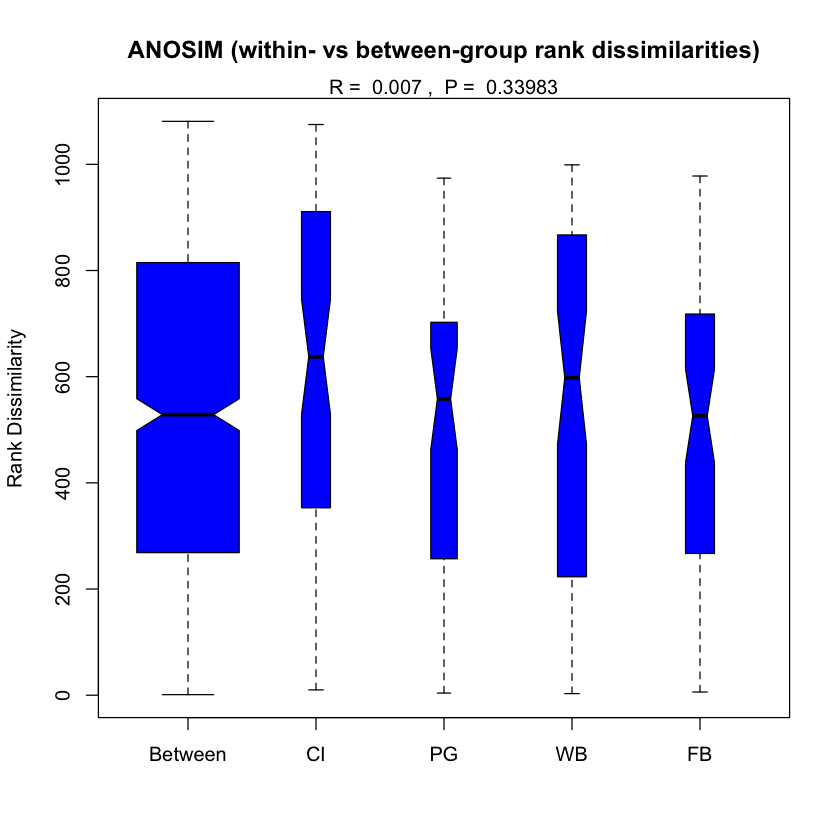

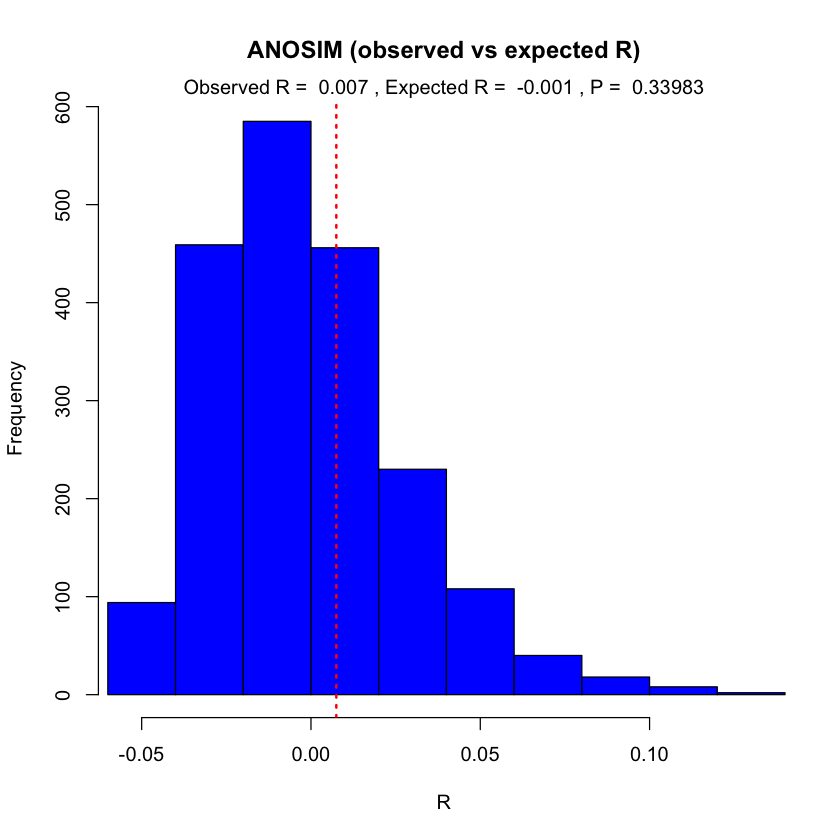

In [46]:
data4anosim.log <- cbind.data.frame(SRM.data.mean.t.log[order(rownames(SRM.data.mean.t.log)),], samples4anosim[order(samples4anosim$SAMPLE),])

# ANOSIM between sites, log+1 transf.
sdms.log.vegdist <- vegdist(data4anosim.log[,-(ncol(data4anosim)-3):-(ncol(data4anosim))], 'bray', na.rm=TRUE)
site.log.anos<-anosim(sdms.log.vegdist, grouping=data4anosim.log$SITE, permutations = 2000)
summary(site.log.anos)
plot(site.log.anos)


Call:
anosim(dat = sdms.log.vegdist, grouping = data4anosim.log$TREATMENT,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: -0.02057 
      Significance: 0.84808 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0289 0.0460 0.0601 0.0795 

Dissimilarity ranks between and within classes:
         0%    25%   50%    75% 100%   N
Between   4 264.00 531.5 800.25 1078 552
Bare      2 246.75 502.0 776.25 1031 276
Eelgrass  1 310.00 596.0 844.00 1081 253

Press return for next plot 


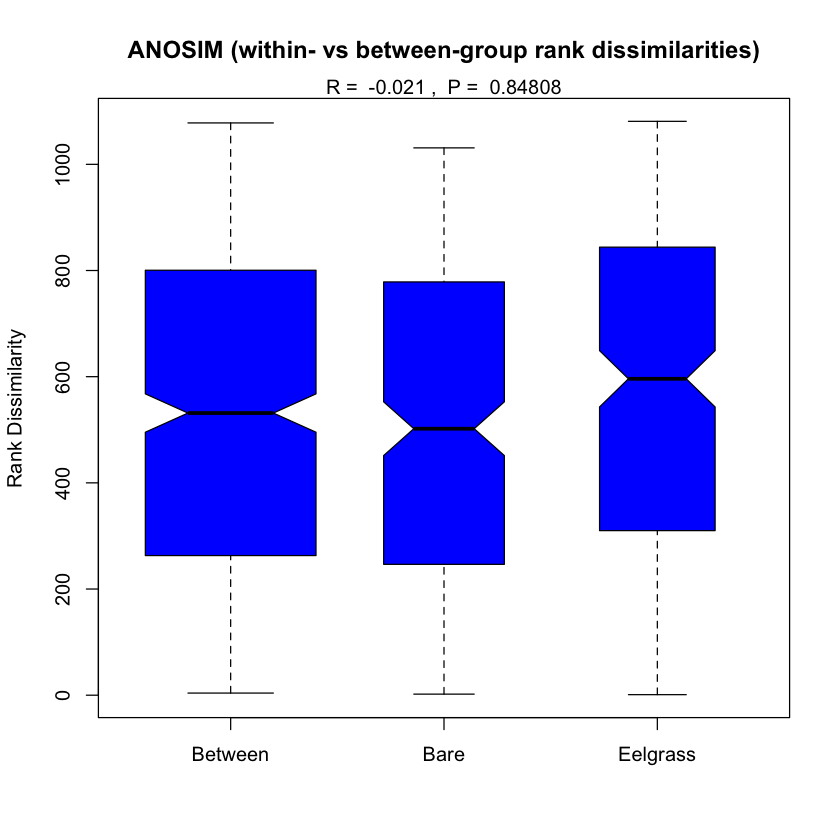

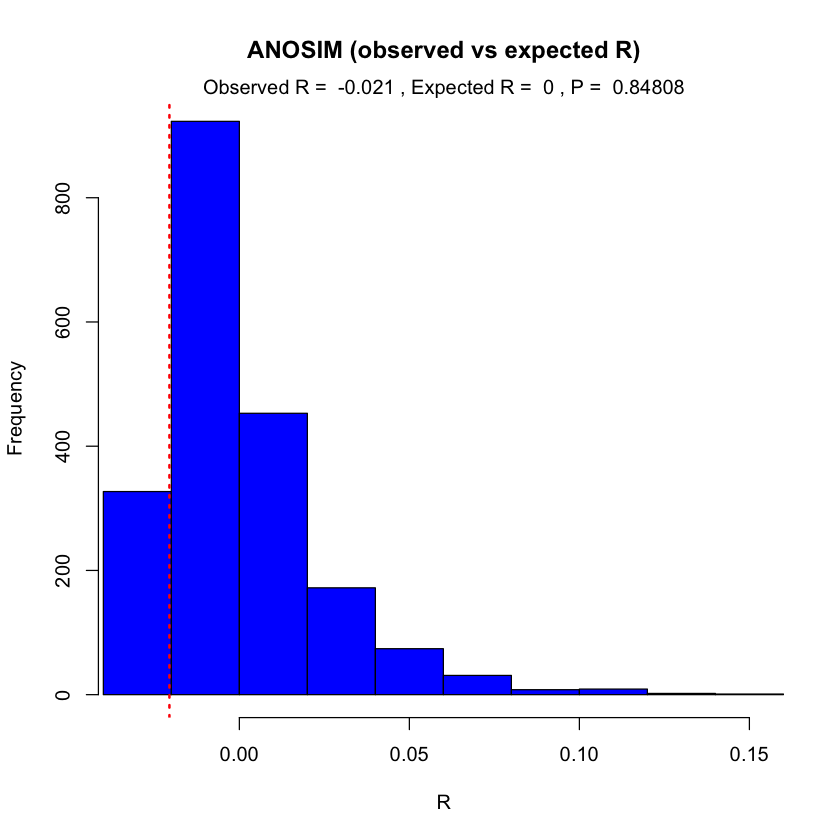

In [47]:
# ANOSIM between treatments, log+1 transf.
treatment.log.anos<-anosim(sdms.log.vegdist, grouping=data4anosim.log$TREATMENT, permutations = 2000)
summary(treatment.log.anos)
plot(treatment.log.anos)


Call:
anosim(dat = sdms.log.vegdist, grouping = data4anosim.log$BOTH,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: -0.03964 
      Significance: 0.84458 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0510 0.0695 0.0841 0.1080 

Dissimilarity ranks between and within classes:
         0%   25%   50%     75% 100%   N
Between   1 262.5 531.5  810.50 1081 966
CI-Bare 140 365.0 628.0  817.00 1007  15
CI-Eel  128 562.5 659.0 1045.50 1075  15
PG-Bare  16 310.0 384.0  657.50  741  15
PG-Eel   13 489.5 617.0  728.75  940  10
WB-Bare   3 453.0 822.0  909.50  991  15
WB-Eel   29 279.0 568.0  815.50  938  15
FB-Eel   43 385.0 577.0  814.00  978  15
FB-Bare  28 258.0 538.0  610.50  693  15



Warning message in bxp(structure(list(stats = structure(c(1, 262, 531.5, 811, 1081, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”

Press return for next plot 


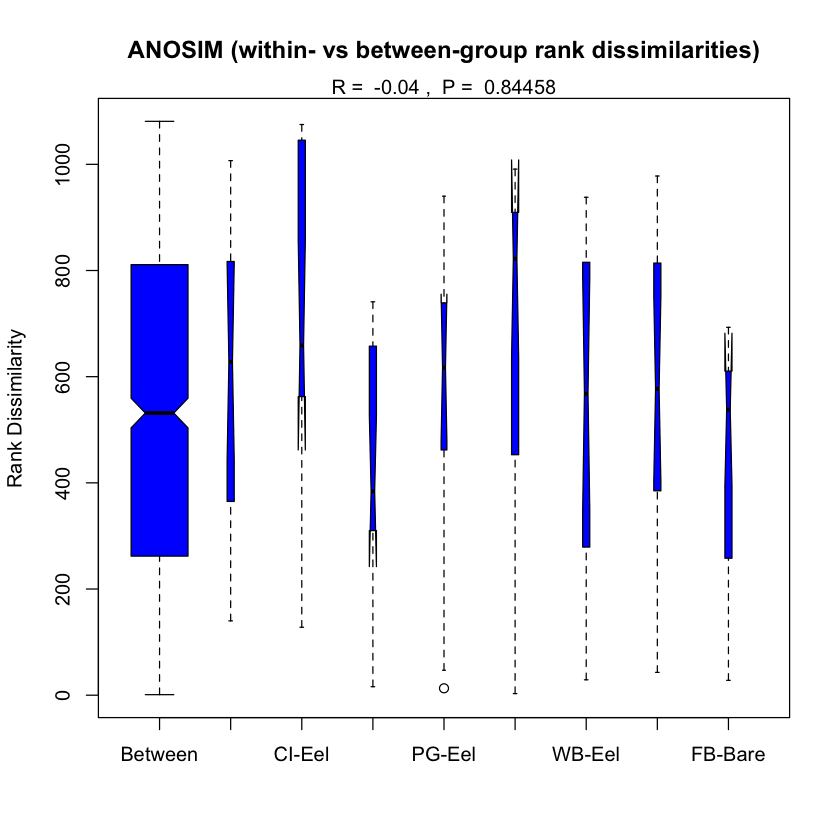

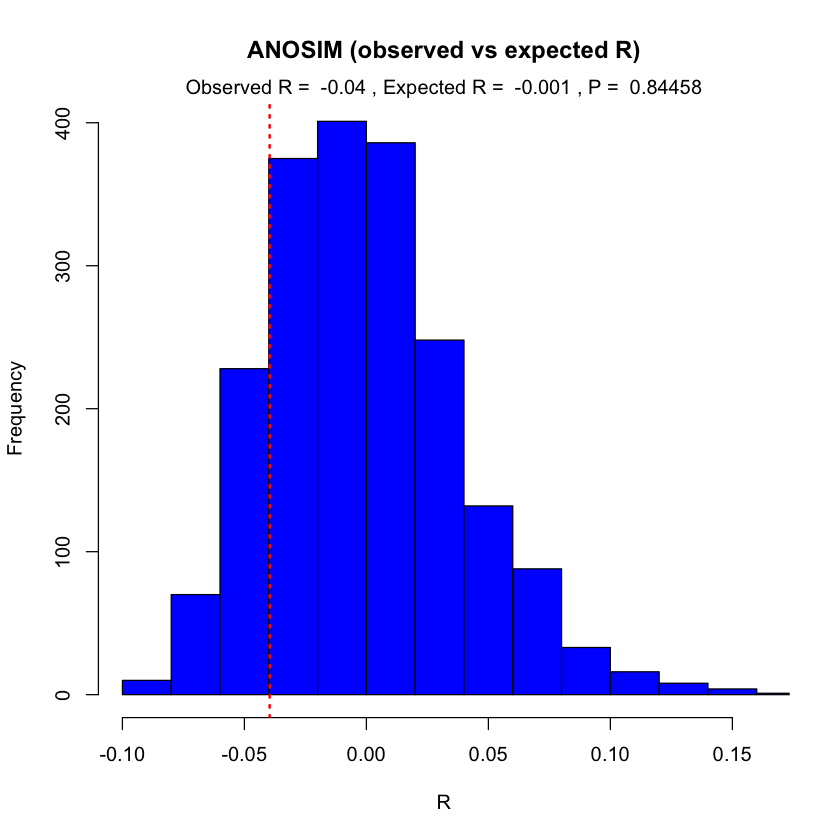

In [48]:
# ANOSIM between site/treatments, log+1 transf.
siteANDtreatment.log.anos <- anosim(sdms.log.vegdist, grouping=data4anosim.log$BOTH, permutations = 2000)
summary(siteANDtreatment.log.anos)
plot(siteANDtreatment.log.anos)

## Script 3: CALCULATE & PLOT MEAN & STANDARD ERROR FOR SAMPLES BY SITE FOR EACH PROTEIN

In [50]:
# Use data4anosim.noNA dataset, melt data to prepare for ggplot
# requires library(reshape2)
data.melted <- melt(data4anosim.noNA, id=c("SAMPLE", "SITE", "TREATMENT", "BOTH"), variable.name = "Transition", value.name = "Area")

In [51]:
# Merge protein names back to abundance data
SRM.proteins <- data.frame(SRM.data.screened.noPRTC[,1:4]) #protein name to each transition
SRM.proteins[,1] <- sub(" cds.*", "", SRM.proteins[,1])
data.melted.plus <- merge(x=data.melted, y=SRM.proteins, by.x = "Transition", by.y = "row.names", all.x=TRUE, all.y=FALSE)
colnames(data.melted.plus)[1] <- "Pep.Trans"
write.csv(data.melted.plus, file="Analyses/2017-September_SRM-results/2017-09-04_SRM-data-notNORM-melted-annotated.csv")

Warning message in merge.data.frame(x = data.melted, y = SRM.proteins, by.x = "Transition", :
“column name ‘Transition’ is duplicated in the result”

## Script #4: Run ANOSIM for each protein separately. 
NOTE: Requires reshape2() library

In [54]:
# Prepare data for anosim by protein, isolating the melted & annotated area data
Arachidonate <- data.melted.plus[grepl(c("Arachidonate"), data.melted.plus$Protein.Name),]
Catalase <- data.melted.plus[grepl(c("Catalase"), data.melted.plus$Protein.Name),]
Cytochrome <- data.melted.plus[grepl(c("Cytochrome"), data.melted.plus$Protein.Name),]
Glycogen <- data.melted.plus[grepl(c("Glycogen"), data.melted.plus$Protein.Name),]
HSP70 <- data.melted.plus[grepl(c("Heat shock 70"), data.melted.plus$Protein.Name),]
HSP90 <- data.melted.plus[grepl(c("HSP 90"), data.melted.plus$Protein.Name),]
Peroxiredoxin <- data.melted.plus[grepl(c("Peroxiredoxin"), data.melted.plus$Protein.Name),]
PDI <- data.melted.plus[grepl(c("Protein disulfide-isomerase"), data.melted.plus$Protein.Name),]
Puromycin <- data.melted.plus[grepl(c("Puromycin"), data.melted.plus$Protein.Name),]
Rab.11B <- data.melted.plus[grepl(c("Rab-11B"), data.melted.plus$Protein.Name),]
NAK <- data.melted.plus[grepl(c("Sodium/potassium"), data.melted.plus$Protein.Name),]
Superoxide <- data.melted.plus[grepl(c("Superoxide"), data.melted.plus$Protein.Name),]
Trifunctional <- data.melted.plus[grepl(c("Trifunctional"), data.melted.plus$Protein.Name),]

In [55]:
# Convert data to long form by casting it, making first column row names
Arachidonate.4anosim <- data.frame(merge(dcast(Arachidonate[,c(1,2,3,6)], SAMPLE~Pep.Trans), samples4anosim, by.x="SAMPLE", by.y="SAMPLE", all.y = TRUE), row.names = 1)
Catalase.4anosim <- data.frame(merge(dcast(Catalase[,c(1,2,6)], SAMPLE~Pep.Trans), samples4anosim, by.x="SAMPLE", by.y="SAMPLE"), row.names = 1)
Cytochrome.4anosim <- data.frame(merge(dcast(Cytochrome[,c(1,2,6)], SAMPLE~Pep.Trans), samples4anosim, by.x="SAMPLE", by.y="SAMPLE"), row.names = 1)
Glycogen.4anosim <- data.frame(merge(dcast(Glycogen[,c(1,2,6)], SAMPLE~Pep.Trans), samples4anosim, by.x="SAMPLE", by.y="SAMPLE"), row.names = 1)
HSP70.4anosim <- data.frame(merge(dcast(HSP70[,c(1,2,6)], SAMPLE~Pep.Trans), samples4anosim, by.x="SAMPLE", by.y="SAMPLE"), row.names = 1)
HSP90.4anosim <- data.frame(merge(dcast(HSP90[,c(1,2,6)], SAMPLE~Pep.Trans), samples4anosim, by.x="SAMPLE", by.y="SAMPLE"), row.names = 1)
Peroxiredoxin.4anosim <- data.frame(merge(dcast(Peroxiredoxin[,c(1,2,6)], SAMPLE~Pep.Trans), samples4anosim, by.x="SAMPLE", by.y="SAMPLE"), row.names = 1)
PDI.4anosim <- data.frame(merge(dcast(PDI[,c(1,2,6)], SAMPLE~Pep.Trans), samples4anosim, by.x="SAMPLE", by.y="SAMPLE"), row.names = 1)
Puromycin.4anosim <- data.frame(merge(dcast(Puromycin[,c(1,2,6)], SAMPLE~Pep.Trans), samples4anosim, by.x="SAMPLE", by.y="SAMPLE"), row.names = 1)
Rab.11B.4anosim <- data.frame(merge(dcast(Rab.11B[,c(1,2,6)], SAMPLE~Pep.Trans), samples4anosim, by.x="SAMPLE", by.y="SAMPLE"), row.names = 1)
NAK.4anosim <- data.frame(merge(dcast(NAK[,c(1,2,6)], SAMPLE~Pep.Trans), samples4anosim, by.x="SAMPLE", by.y="SAMPLE"), row.names = 1)
Superoxide.4anosim <- data.frame(merge(dcast(Superoxide[,c(1,2,6)], SAMPLE~Pep.Trans), samples4anosim, by.x="SAMPLE", by.y="SAMPLE"), row.names = 1)
Trifunctional.4anosim <- data.frame(merge(dcast(Trifunctional[,c(1,2,6)], SAMPLE~Pep.Trans), samples4anosim, by.x="SAMPLE", by.y="SAMPLE"), row.names = 1)

Using Area as value column: use value.var to override.
Using Area as value column: use value.var to override.
Using Area as value column: use value.var to override.
Using Area as value column: use value.var to override.
Using Area as value column: use value.var to override.
Using Area as value column: use value.var to override.
Using Area as value column: use value.var to override.
Using Area as value column: use value.var to override.
Using Area as value column: use value.var to override.
Using Area as value column: use value.var to override.
Using Area as value column: use value.var to override.
Using Area as value column: use value.var to override.
Using Area as value column: use value.var to override.


In [57]:
head(Arachidonate.4anosim)

,APGLPAQIK.y6,APGLPAQIK.y5,APGLPAQIK.y4,MDVEGTLPEDLK.y9,MDVEGTLPEDLK.y8,MDVEGTLPEDLK.y5,GLGLGGVPGQNGK.y9,GLGLGGVPGQNGK.y8,GLGLGGVPGQNGK.y6,SITE,TREATMENT,BOTH
G001,133746,2355419,42333,291609,431818,379717,593564,137989,806025,CI,Eelgrass,CI-Eel
G002,1014419,18855988,386106,1212041,2029533,1734641,2047815,471937,2908575,CI,Eelgrass,CI-Eel
G003,16697,253995,4776,12866,18741,20021,73069,17344,86499,CI,Eelgrass,CI-Eel
G007,601297,10573266,195702,1168878,1883285,1622869,1751792,374533,2270827,CI,Eelgrass,CI-Eel
G008,371443,6598388,119149,540512,851004,721417,1068395,231101,1438009,CI,Eelgrass,CI-Eel
G009,247723,4012075,72267,464842,704552,639514,956427,226776,1292209,CI,Eelgrass,CI-Eel


### Generate ANOSIM for each protein, grouped by site
I only plot the proteins where a significance is found by site, aka "Significance" <0.05

In [58]:
# P=0.42129 
Arachidonate.vegdist <- vegdist(Arachidonate.4anosim[,1:9], 'bray', na.rm=TRUE)
Arachidonate.ANOSIM <-anosim(Arachidonate.vegdist, Arachidonate.4anosim$SITE, permutations = 2000)
summary(Arachidonate.ANOSIM)


Call:
anosim(dat = Arachidonate.vegdist, grouping = Arachidonate.4anosim$SITE,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: 0.0003151 
      Significance: 0.42779 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0455 0.0669 0.0849 0.1096 

Dissimilarity ranks between and within classes:
        0%    25%   50%    75% 100%   N
Between  1 265.75 533.5 816.25 1081 828
CI      75 468.25 768.5 989.50 1080  66
PG      11 224.50 489.0 768.00  957  55
WB      16 254.25 501.5 738.75 1002  66
FB       2 160.75 503.0 649.75  872  66



In [59]:
# P=0.74863 
Catalase.vegdist <- vegdist(Catalase.4anosim[,1:9], 'bray', na.rm=TRUE)
Catalase.ANOSIM <-anosim(Catalase.vegdist, grouping=Catalase.4anosim$SITE, permutations = 2000)
summary(Catalase.ANOSIM)


Call:
anosim(dat = Catalase.vegdist, grouping = Catalase.4anosim$SITE,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: -0.02584 
      Significance: 0.75662 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0503 0.0742 0.0940 0.1154 

Dissimilarity ranks between and within classes:
        0%    25%   50%    75% 100%   N
Between  1 277.50 530.5 801.25 1079 828
CI       7 348.00 666.0 932.00 1081  66
PG      12 295.50 614.0 851.50 1050  55
WB       2 242.75 530.0 742.75  989  66
FB       9 153.50 599.5 768.25  938  66



In [60]:
# P=0.81259
Cytochrome.vegdist <- vegdist(Cytochrome.4anosim[,1:9], 'bray', na.rm=TRUE)
Cytochrome.ANOSIM <-anosim(Cytochrome.vegdist, grouping=Cytochrome.4anosim$SITE, permutations = 2000)
summary(Cytochrome.ANOSIM)


Call:
anosim(dat = Cytochrome.vegdist, grouping = Cytochrome.4anosim$SITE,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: -0.0278 
      Significance: 0.81209 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0433 0.0602 0.0774 0.0975 

Dissimilarity ranks between and within classes:
        0%    25%   50%    75% 100%   N
Between  2 260.75 532.5 813.25 1080 828
CI      72 496.50 816.0 990.75 1081  66
PG      12 172.00 469.0 634.00  947  55
WB      33 294.75 574.0 797.75 1020  66
FB       1 271.50 470.5 672.50  966  66



In [61]:
# P=0.70465 
Glycogen.vegdist <- vegdist(Glycogen.4anosim[,1:9], 'bray', na.rm=TRUE)
Glycogen.ANOSIM <-anosim(Glycogen.vegdist, grouping=Glycogen.4anosim$SITE, permutations = 2000)
summary(Glycogen.ANOSIM)


Call:
anosim(dat = Glycogen.vegdist, grouping = Glycogen.4anosim$SITE,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: -0.01896 
      Significance: 0.65367 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0447 0.0636 0.0811 0.1040 

Dissimilarity ranks between and within classes:
        0%    25%   50%    75% 100%   N
Between  1 267.75 538.5 813.75 1081 828
CI      45 410.25 699.5 925.50 1075  66
PG       8 259.00 620.0 787.50 1030  55
WB      10 224.25 524.0 829.00 1031  66
FB      47 220.50 425.0 657.00  888  66




Call:
anosim(dat = HSP70.vegdist, grouping = HSP70.4anosim$SITE, permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: 0.1478 
      Significance: 0.00049975 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0410 0.0546 0.0702 0.0861 

Dissimilarity ranks between and within classes:
        0%    25%   50%    75% 100%   N
Between  1 288.75 575.5 837.50 1081 828
CI      61 456.25 738.5 952.50 1072  66
PG      15 238.50 492.0 660.50  971  55
WB      11 191.00 373.0 585.75  889  66
FB      12 189.25 365.0 533.00  797  66

Press return for next plot 


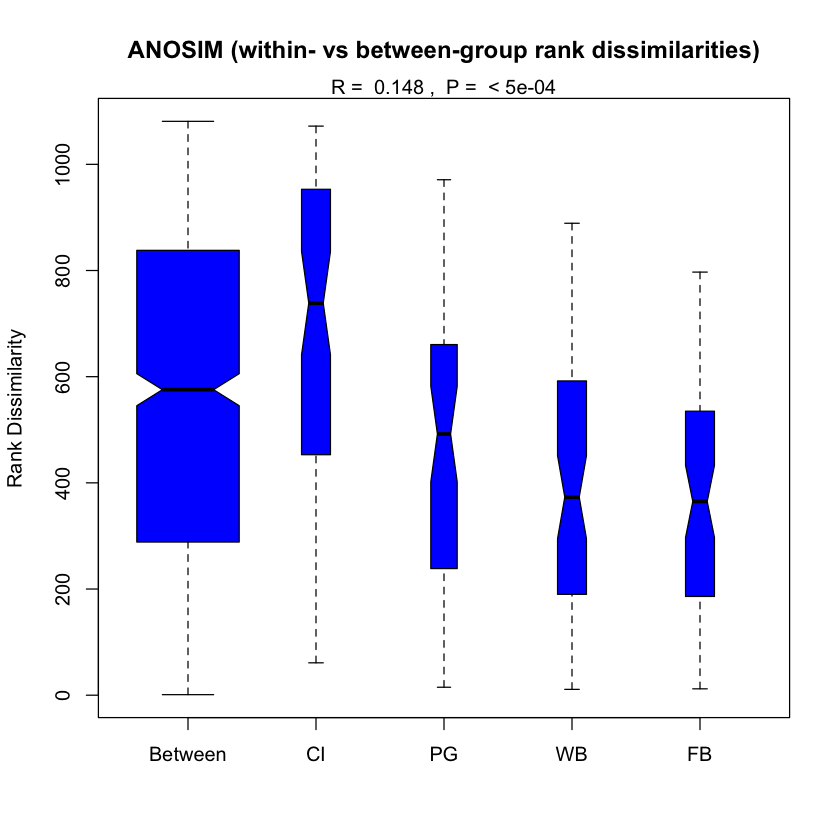

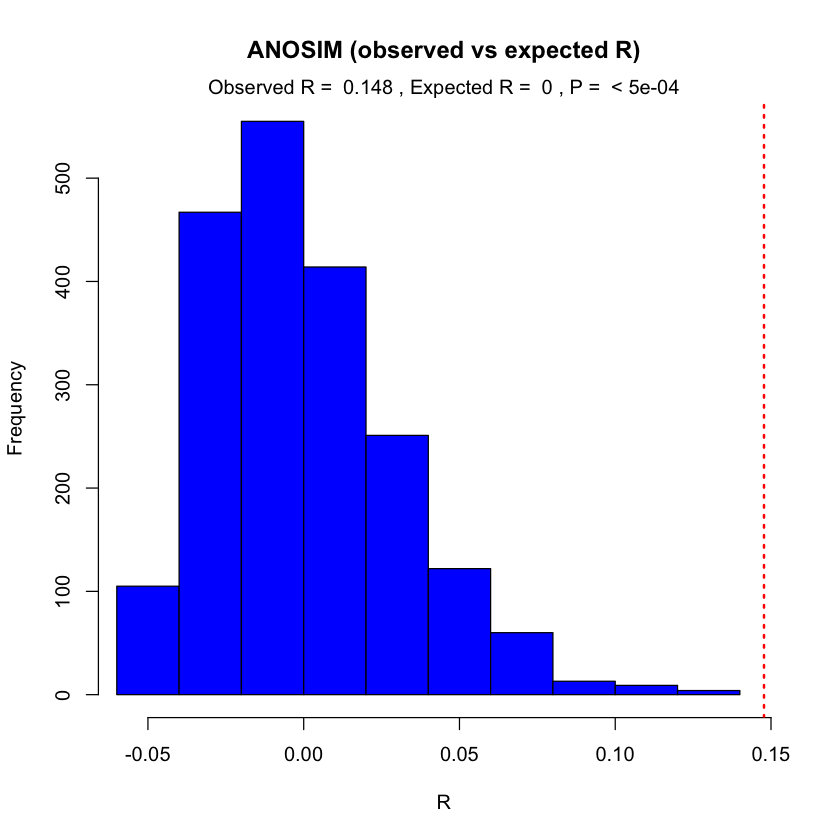

In [65]:
# P=0.00049975 
HSP70.vegdist <- vegdist(HSP70.4anosim[,1:6], 'bray', na.rm=TRUE)
HSP70.ANOSIM <-anosim(HSP70.vegdist, grouping=HSP70.4anosim$SITE, permutations = 2000)
summary(HSP70.ANOSIM)
plot(HSP70.ANOSIM)


Call:
anosim(dat = HSP90.vegdist, grouping = HSP90.4anosim$SITE, permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: 0.06916 
      Significance: 0.031984 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0411 0.0566 0.0746 0.0901 

Dissimilarity ranks between and within classes:
        0%   25%   50%   75% 100%   N
Between  1 274.5 550.5 825.5 1081 828
CI       7 431.5 697.0 983.5 1071  66
PG      11 287.0 526.0 730.0  968  55
WB      15 225.5 455.0 703.5  961  66
FB       5 193.0 388.0 603.5  848  66

Press return for next plot 


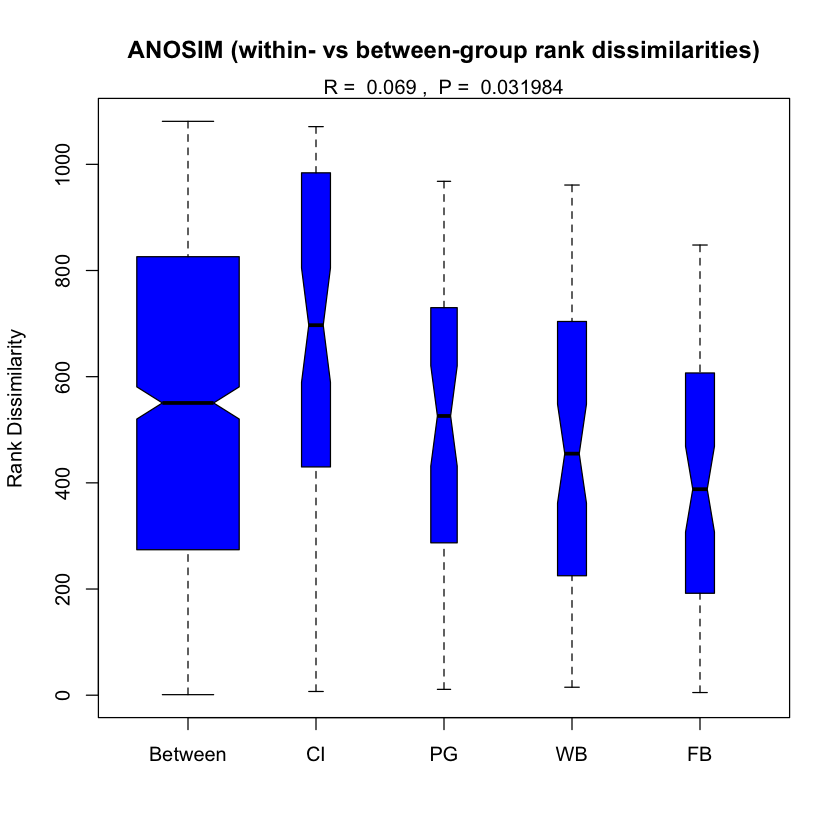

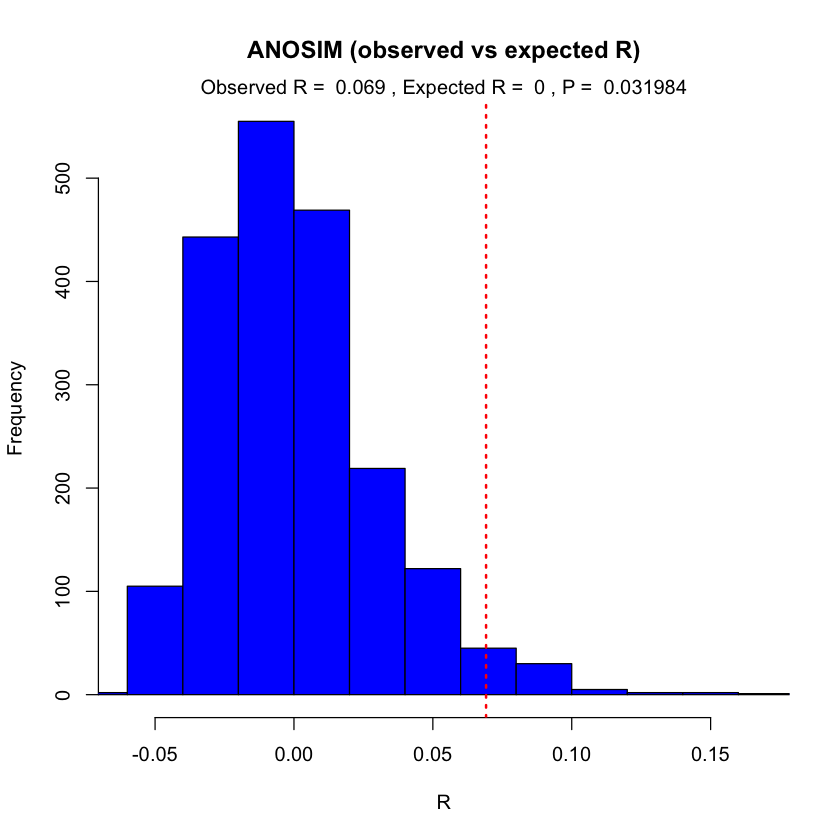

In [66]:
# P=0.023488 
HSP90.vegdist <- vegdist(HSP90.4anosim[,1:9], 'bray', na.rm=TRUE)
HSP90.ANOSIM <-anosim(HSP90.vegdist, grouping=HSP90.4anosim$SITE, permutations = 2000)
summary(HSP90.ANOSIM)
plot(HSP90.ANOSIM)


Call:
anosim(dat = PDI.vegdist, grouping = PDI.4anosim$SITE, permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: 0.07781 
      Significance: 0.030985 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0478 0.0639 0.0802 0.1009 

Dissimilarity ranks between and within classes:
        0%    25%   50%    75% 100%   N
Between  2 283.75 547.0 834.00 1081 828
CI       1 332.75 671.5 943.75 1071  66
PG       9 172.00 565.0 777.50 1010  55
WB       4 178.00 501.5 706.25  977  66
FB      20 223.00 427.5 627.50  905  66

Press return for next plot 


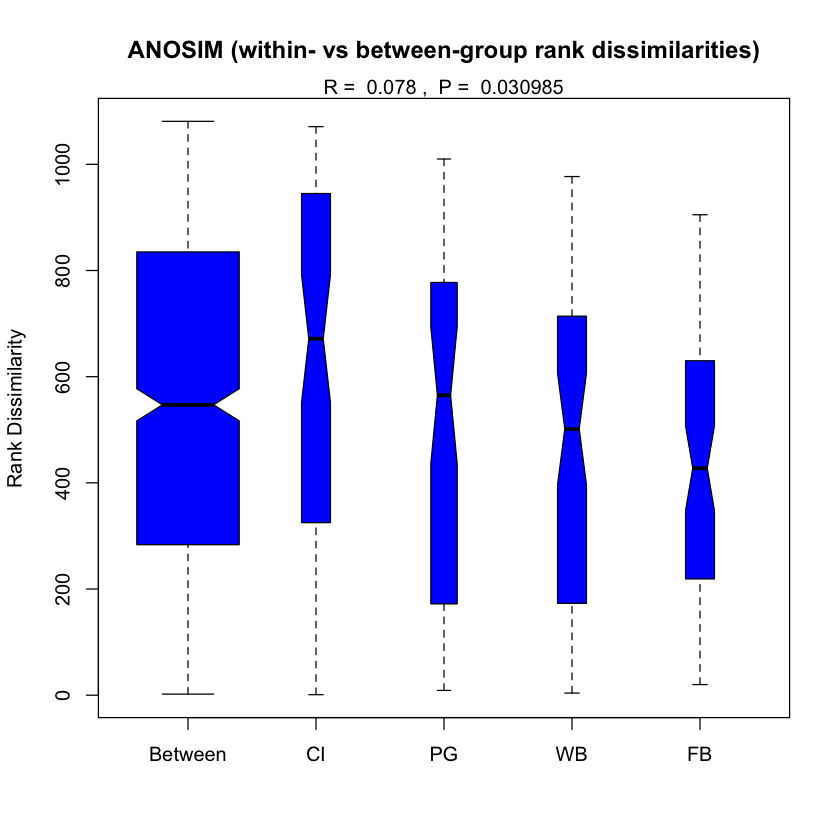

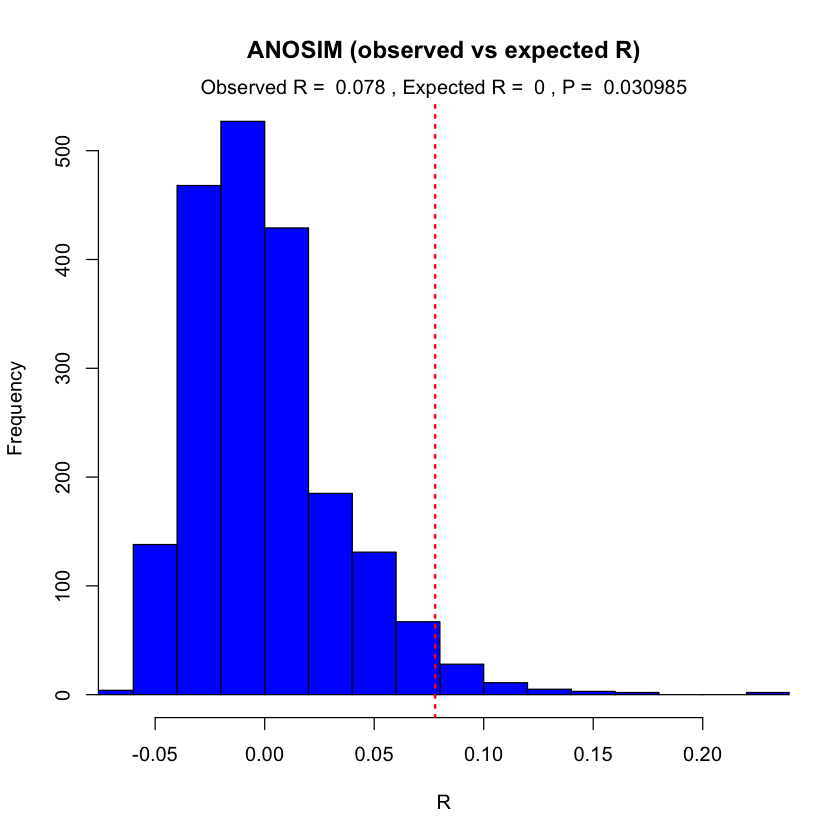

In [67]:
#P=0.028986 
PDI.vegdist <- vegdist(PDI.4anosim[,1:6], 'bray', na.rm=TRUE)
PDI.ANOSIM <-anosim(PDI.vegdist, grouping=PDI.4anosim$SITE, permutations = 2000)
summary(PDI.ANOSIM)
plot(PDI.ANOSIM)

In [68]:
#P=0.56122 
Puromycin.vegdist <- vegdist(Puromycin.4anosim[,1:9], 'bray', na.rm=TRUE)
Puromycin.ANOSIM <-anosim(Puromycin.vegdist, grouping=Puromycin.4anosim$SITE, permutations = 2000)
summary(Puromycin.ANOSIM)


Call:
anosim(dat = Puromycin.vegdist, grouping = Puromycin.4anosim$SITE,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: -0.01089 
      Significance: 0.5902 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0416 0.0584 0.0755 0.0914 

Dissimilarity ranks between and within classes:
        0%    25%   50%    75% 100%   N
Between  1 261.75 532.5 815.25 1081 828
CI       9 322.50 684.0 974.75 1076  66
PG      22 267.50 563.0 749.50  983  55
WB      13 284.25 542.0 804.00  967  66
FB      28 285.25 493.0 733.50  908  66



In [69]:
#P= 0.81959 
Rab.11B.vegdist <- vegdist(Rab.11B.4anosim[,1:3], 'bray', na.rm=TRUE)
Rab.11B.ANOSIM <-anosim(Rab.11B.vegdist, grouping=Rab.11B.4anosim$SITE, permutations = 2000)
summary(Rab.11B.ANOSIM)


Call:
anosim(dat = Rab.11B.vegdist, grouping = Rab.11B.4anosim$SITE,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: -0.02995 
      Significance: 0.84258 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0411 0.0618 0.0811 0.1047 

Dissimilarity ranks between and within classes:
        0%    25% 50%    75% 100%   N
Between  1 266.75 530 813.75 1081 828
CI      29 374.50 721 960.00 1076  66
PG      38 265.00 596 780.00 1011  55
WB       5 266.25 659 818.50 1014  66
FB       7 266.00 423 609.00  903  66



In [70]:
#P=0.64118 
NAK.vegdist <- vegdist(NAK.4anosim[,1:6], 'bray', na.rm=TRUE)
NAK.ANOSIM <-anosim(NAK.vegdist, grouping=NAK.4anosim$SITE, permutations = 2000)
summary(NAK.ANOSIM)


Call:
anosim(dat = NAK.vegdist, grouping = NAK.4anosim$SITE, permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: -0.01686 
      Significance: 0.62969 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0421 0.0604 0.0788 0.1063 

Dissimilarity ranks between and within classes:
        0%    25%   50%    75% 100%   N
Between  1 274.75 531.5 813.50 1080 828
CI      94 432.25 715.5 965.50 1081  66
PG      13 180.50 639.0 782.00 1023  55
WB       4 234.75 522.0 809.25 1012  66
FB      16 224.75 464.0 683.75  879  66



In [71]:
#P=0.88556 
Superoxide.vegdist <- vegdist(Superoxide.4anosim[,1:5], 'bray', na.rm=TRUE)
Superoxide.ANOSIM <-anosim(Superoxide.vegdist, grouping=Superoxide.4anosim$SITE, permutations = 2000)
summary(Superoxide.ANOSIM)


Call:
anosim(dat = Superoxide.vegdist, grouping = Superoxide.4anosim$SITE,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: -0.03678 
      Significance: 0.87756 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0472 0.0666 0.0943 0.1108 

Dissimilarity ranks between and within classes:
        0%    25%   50%    75% 100%   N
Between  1 264.75 528.5 810.25 1080 828
CI      35 405.25 657.0 999.25 1081  66
PG      39 310.50 623.0 852.50 1013  55
WB      15 243.75 539.0 797.25  980  66
FB      22 252.25 471.0 708.75  941  66



In [73]:
#P=0.089455 
Trifunctional.vegdist <- vegdist(Trifunctional.4anosim[,1:9], 'bray', na.rm=TRUE)
Trifunctional.ANOSIM <-anosim(Trifunctional.vegdist, grouping=Trifunctional.4anosim$SITE, permutations = 2000)
summary(Trifunctional.ANOSIM)


Call:
anosim(dat = Trifunctional.vegdist, grouping = Trifunctional.4anosim$SITE,      permutations = 2000) 
Dissimilarity: bray 

ANOSIM statistic R: 0.04899 
      Significance: 0.087956 

Permutation: free
Number of permutations: 2000

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0458 0.0624 0.0785 0.1000 

Dissimilarity ranks between and within classes:
        0%    25%   50%    75% 100%   N
Between  1 276.50 545.5 830.50 1081 828
CI      53 430.00 685.5 948.50 1074  66
PG      15 313.50 466.0 783.50 1001  55
WB      19 172.75 514.0 670.50  969  66
FB       5 218.00 385.5 655.75  810  66



### Box plots of proteins found to be significantly different between sites (ANOSIM)

In [76]:
# requires library(ggplot2)
levels(data.melted.plus$SITE)
data.melted.plus$SITE <- factor(data.melted.plus$SITE, levels=c("WB", "CI", "PG", "FB")) #re-arrange "levels" of site factor geographically

[1] "WB" "CI" "PG" "FB"

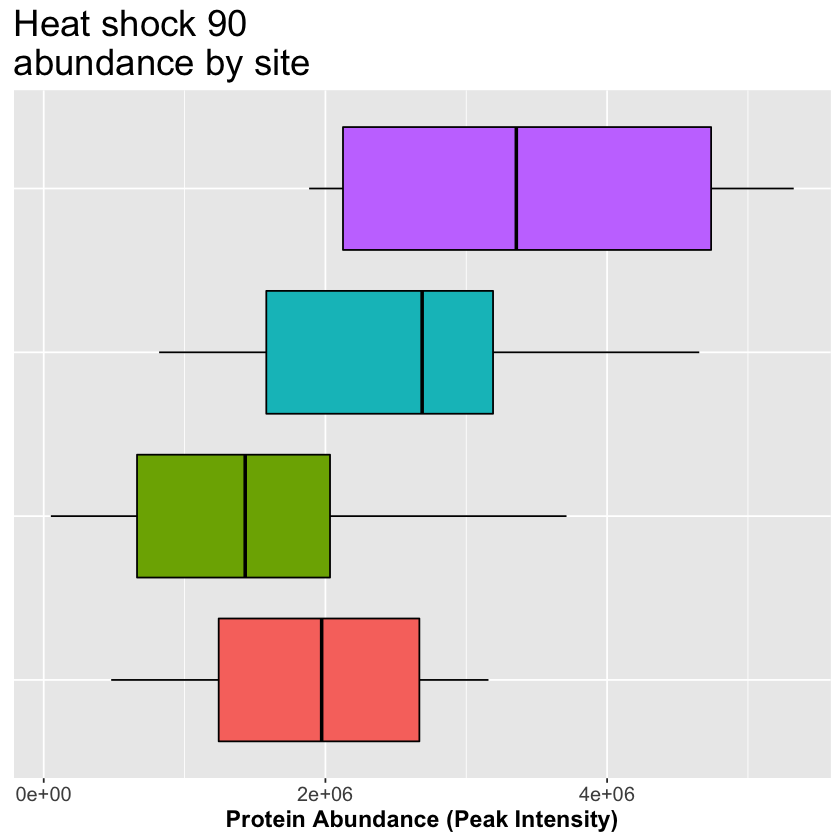

In [77]:
# HSP 90
#png("Analyses/2017-September_SRM-results/2017-09-04_NotNORM-boxplot-HSP90.png", width = 400, height = 500)
ggplot(subset(data.melted.plus, Pep.Trans %in% "GVVDSEDLPLNISR y7"), aes(x=SITE, y=Area, fill=SITE)) + 
  geom_boxplot(color="black", position = position_dodge()) + 
  ggtitle("Heat shock 90 \nabundance by site") + 
  theme(plot.title = element_text(size=22), axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold"), axis.title.y=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank()) + 
  guides(fill=FALSE) +
  scale_fill_discrete(labels=c("Willapa Bay", "Case Inlet", "Fidalgo Bay", "Port Gamble")) + 
  ylab("Protein Abundance (Peak Intensity)") +
  coord_flip()
#dev.off()

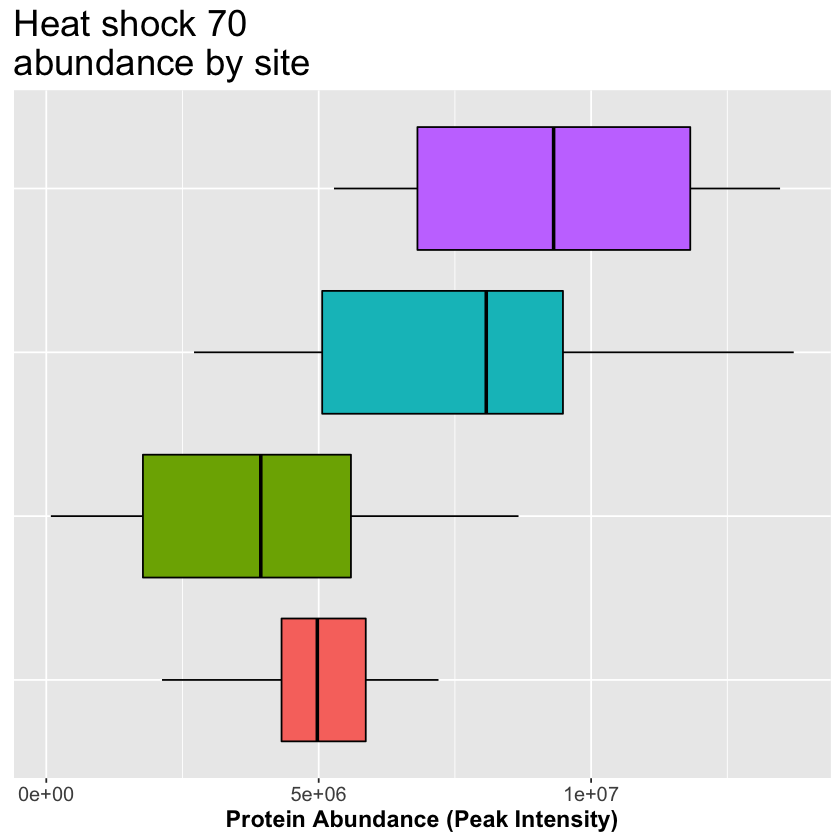

In [78]:
# HSP 70
#png("Analyses/2017-September_SRM-results/2017-09-04_NotNORM-boxplot-HSP70.png", width = 400, height = 500)
ggplot(subset(data.melted.plus, Pep.Trans %in% "IINEPTAAALAYGLDK y12"), aes(x=SITE, y=Area, fill=SITE)) + 
  geom_boxplot(color="black", position = position_dodge()) + 
  ggtitle("Heat shock 70 \nabundance by site") + 
  theme(plot.title = element_text(size=22), axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold"), axis.title.y=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank()) + 
  guides(fill=FALSE) +
  scale_fill_discrete(labels=c("Willapa Bay", "Case Inlet", "Fidalgo Bay", "Port Gamble")) + 
  ylab("Protein Abundance (Peak Intensity)") +
  coord_flip()
#dev.off()

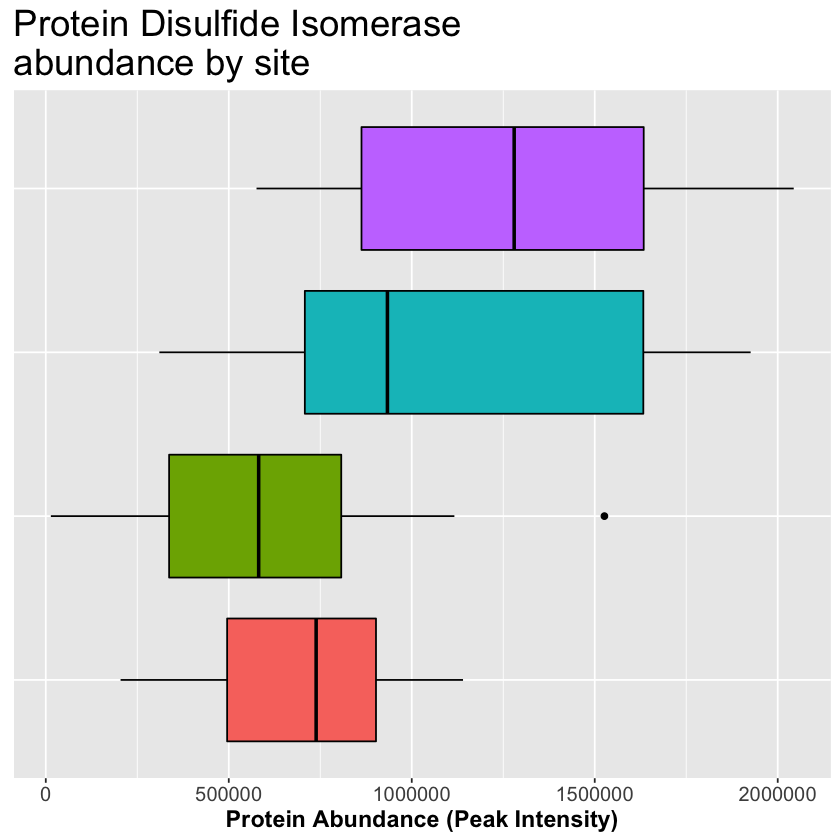

In [79]:
# PDI
#png("Analyses/2017-September_SRM-results/2017-09-04_NotNORM-boxplot-PDI.png", width = 400, height = 500)
ggplot(subset(data.melted.plus, Pep.Trans %in% "DNVVVIGFFK y5"), aes(x=SITE, y=Area, fill=SITE)) + 
  geom_boxplot(color="black", position = position_dodge()) + 
  ggtitle("Protein Disulfide Isomerase \nabundance by site") + 
  theme(plot.title = element_text(size=22), axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold"), axis.title.y=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank()) + 
  guides(fill=FALSE) +
  scale_fill_discrete(labels=c("Willapa Bay", "Case Inlet", "Fidalgo Bay", "Port Gamble")) + 
  ylab("Protein Abundance (Peak Intensity)") +
  coord_flip()
#dev.off()

## Check versions of all packages used

In [3]:
sessionInfo()

R version 3.3.1 (2016-06-21)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: OS X 10.11.6 (El Capitan)

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] vegan_2.4-3        lattice_0.20-33    permute_0.9-4      RColorBrewer_1.1-2
[5] reshape2_1.4.2     ggplot2_2.2.1      dplyr_0.5.0       

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.9         cluster_2.0.4       magrittr_1.5       
 [4] MASS_7.3-45         munsell_0.4.3       uuid_0.1-2         
 [7] colorspace_1.2-7    R6_2.2.0            stringr_1.1.0      
[10] plyr_1.8.4          tools_3.3.1         parallel_3.3.1     
[13] grid_3.3.1          nlme_3.1-128        gtable_0.2.0       
[16] mgcv_1.8-12         DBI_0.6             lazyeval_0.2.0     
[19] assertthat_0.1      digest_0.6.12       tibble_1.2         
[22] crayon_1.3.2        Matrix_1.2-6        